# Bitcoin Exploratory Data Analysis

### Import Libraries and helper function to load the data

In [1]:
import sys

# Get the path to the helper functions
sys.path.append('../src/')

import importlib
import helper.data as data
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('petroff10')

from datetime import datetime
import seaborn as sns
import polars as pl

# Reload helper functions
importlib.reload(data)

def log_return(df):
    return df.with_columns([
        (pl.col("close") / pl.col("close").shift(1) - 1).alias("return"),
        (pl.col("close").log() - pl.col("close").shift(1).log()).alias("log_return")
    ])


### Load each part of the Bitcoin data from 1 Jan 2018 to 1 Jan 2019

In [2]:
df1 = data.load_btc_2018_2019("../data/btc_2018_2019.csv", part=1)
df2 = data.load_btc_2018_2019("../data/btc_2018_2019.csv", part=2)
df3 = data.load_btc_2018_2019("../data/btc_2018_2019.csv", part=3)
df4 = data.load_btc_2018_2019("../data/btc_2018_2019.csv", part=4)
df5 = data.load_btc_2018_2019("../data/btc_2018_2019.csv", part=5)
df6 = data.load_btc_2018_2019("../data/btc_2018_2019.csv", part=6)

### Basic Information

Quickly inspect the structure, data quality, and basic statistics of the dataset. Prints a quick overview of a BTC OHLCV dataset. Specifically, it:
* Displays the **first 2 rows** to show how the data begins
* Displays the **last 2 rows** to show how the data ends
* Prints **summary statistics** (mean, std, min, max, quartiles) for all numeric columns
* Shows the **number of missing values** in each column using `df.null_count()`

In [3]:
def basic_info(df):
    print(df.head(2))
    print(df.tail(2))
    print(df.describe())
    
    print("Missing values per column:")
    print(df.null_count())

In [4]:
basic_info(df1)
basic_info(df2)
basic_info(df3)
basic_info(df4)
basic_info(df5)
basic_info(df6)

shape: (2, 6)
┌─────────────────────┬──────────┬──────────┬──────────┬──────────┬───────────┐
│ timestamp           ┆ open     ┆ high     ┆ low      ┆ close    ┆ volume    │
│ ---                 ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---       │
│ datetime[μs]        ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64       │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╪═══════════╡
│ 2018-01-01 00:00:00 ┆ 13840.53 ┆ 13840.53 ┆ 13819.04 ┆ 13820.96 ┆ 1.045522  │
│ 2018-01-01 00:01:00 ┆ 13821.05 ┆ 13888.9  ┆ 13821.05 ┆ 13850.67 ┆ 18.083867 │
└─────────────────────┴──────────┴──────────┴──────────┴──────────┴───────────┘
shape: (2, 6)
┌─────────────────────┬──────────┬──────────┬──────────┬──────────┬───────────┐
│ timestamp           ┆ open     ┆ high     ┆ low      ┆ close    ┆ volume    │
│ ---                 ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---       │
│ datetime[μs]        ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64       │
╞═══════════

### Plotting Closing Price

Closing price is one of the most important indicators of market trends and trader sentiment, making it a natural first signal to inspect. Quickly visualize the closing price behavior of the BTC dataset over time. Plots a clean time-series chart of the closing prices.  

In [5]:
def closing_price(df, title):
    # Convert timestamp for plotting
    ts = df["timestamp"].to_pandas()
    close = df["close"].to_pandas()

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(ts, close, linewidth=1, alpha=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")

    plt.grid(True, alpha=0.3)

    # Improve date formatting
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


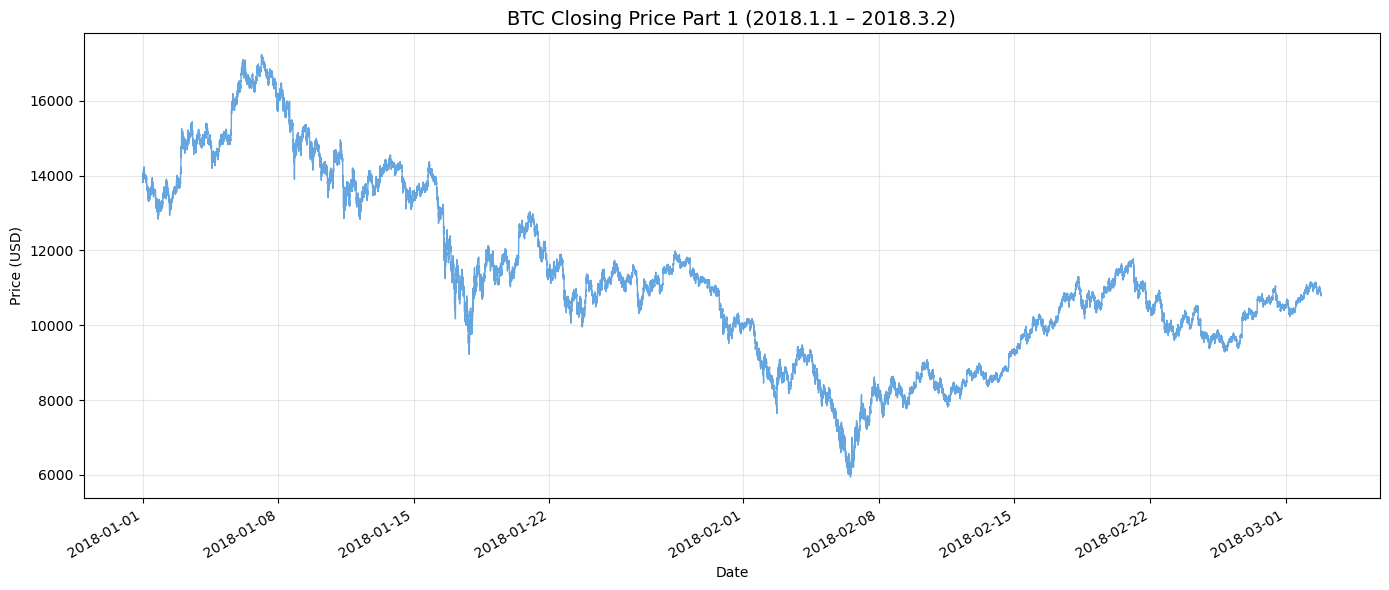

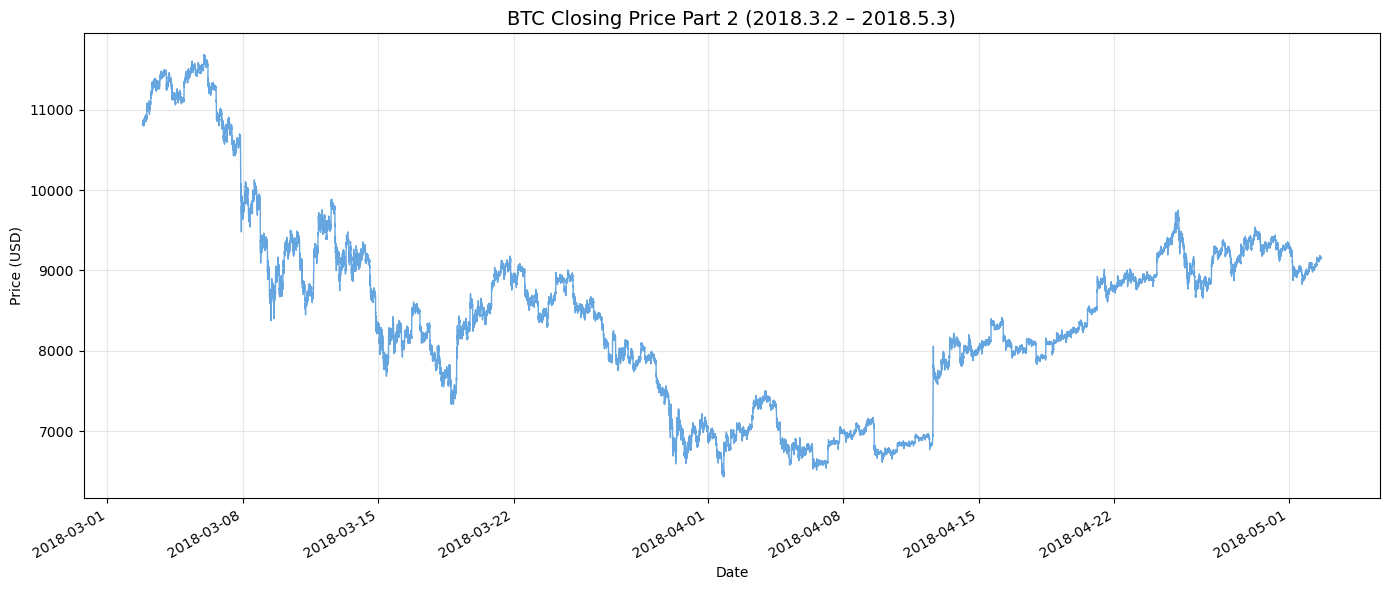

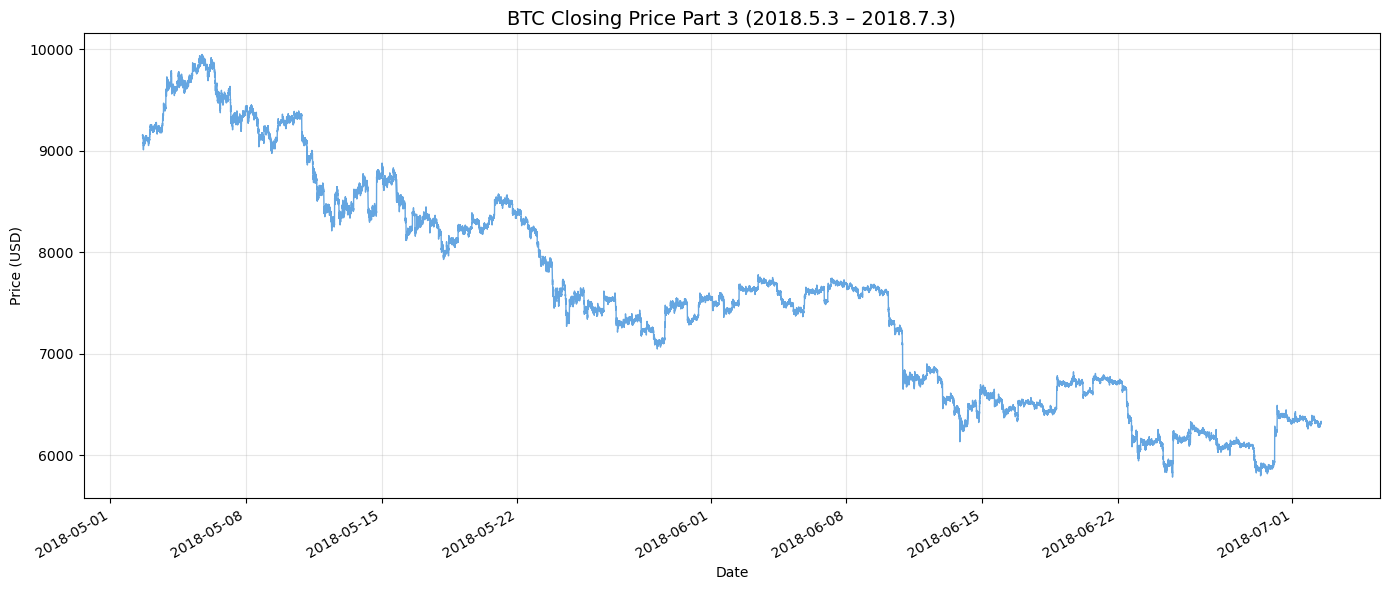

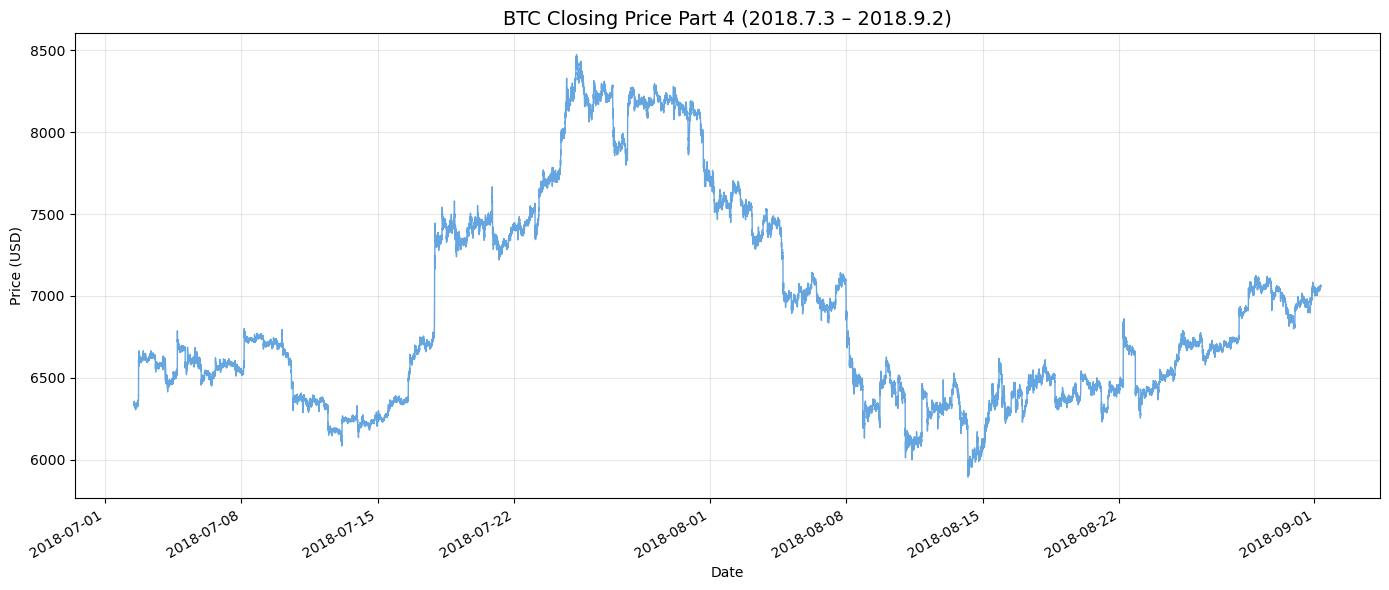

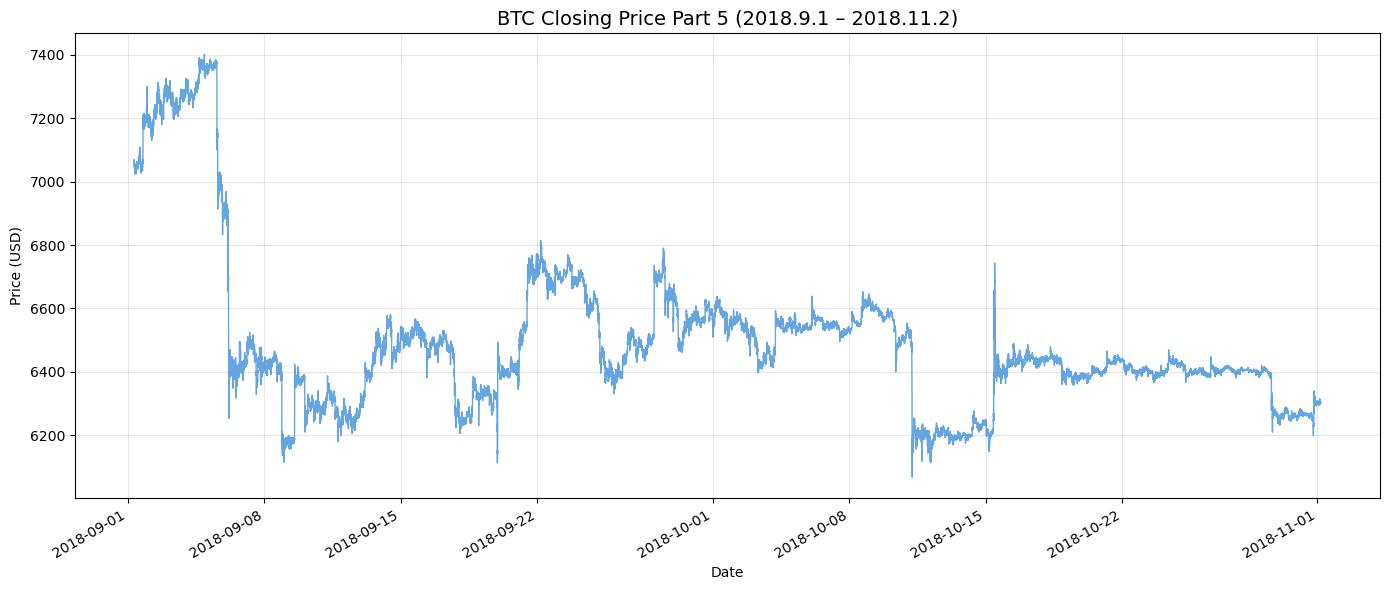

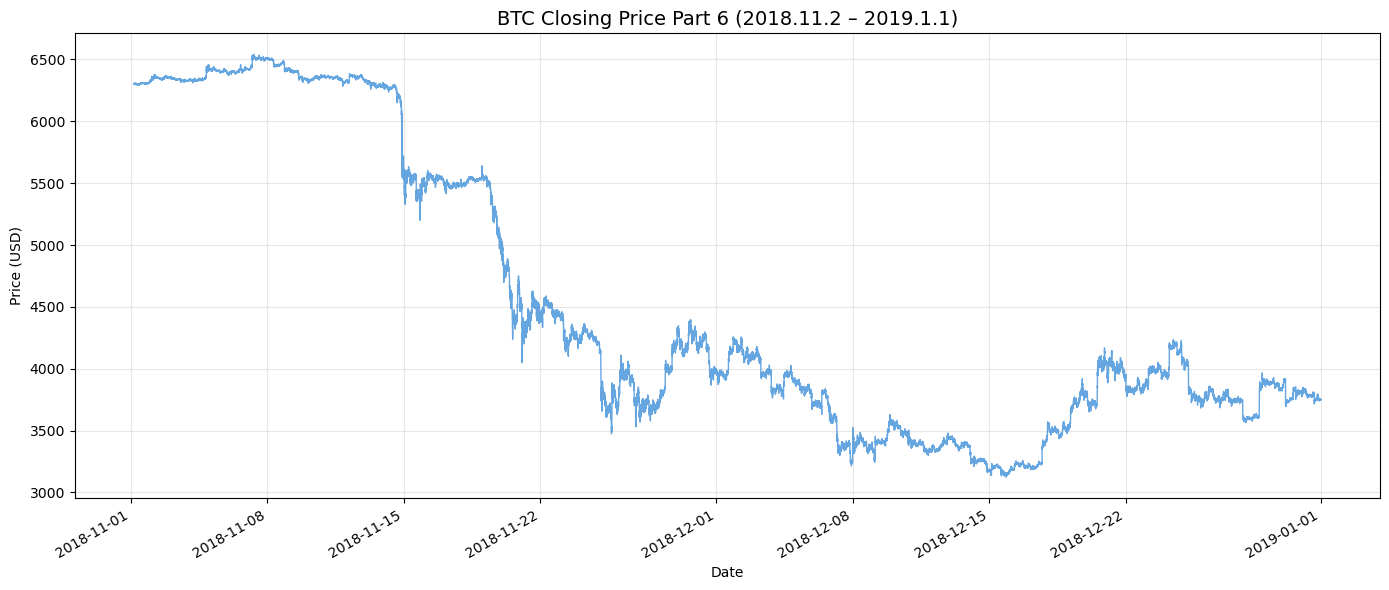

In [6]:
closing_price(df1, "BTC Closing Price Part 1 (2018.1.1 – 2018.3.2)")
closing_price(df2, "BTC Closing Price Part 2 (2018.3.2 – 2018.5.3)")
closing_price(df3, "BTC Closing Price Part 3 (2018.5.3 – 2018.7.3)")
closing_price(df4, "BTC Closing Price Part 4 (2018.7.3 – 2018.9.2)")
closing_price(df5, "BTC Closing Price Part 5 (2018.9.1 – 2018.11.2)")
closing_price(df6, "BTC Closing Price Part 6 (2018.11.2 – 2019.1.1)")

### Compute Return and Plot Daily Returns

Log returns help reveal the true volatility structure of BTC by stabilizing variance and making returns additive over time, which makes them a natural next signal to inspect after closing price. Quickly visualize the log-return behavior of the BTC dataset over time. Plots a clean time-series chart of the log returns.

In [7]:
def log_return_plot(df, title):
    # Compute returns and log returns
    df = log_return(df)
    
    # Drop nulls
    df = df.drop_nulls(subset=["return"])
    
    # Convert timestamp to pandas for plotting
    ts = df["timestamp"].to_pandas()
    lr = df["log_return"].to_pandas()

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(ts, lr, linewidth=1, alpha=0.8)

    # Zero line
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", alpha=0.6)

    # Titles & labels
    plt.title(title, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Log Return")

    # Gray grid on white background
    plt.grid(True, alpha=0.3)

    # Date formatting
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


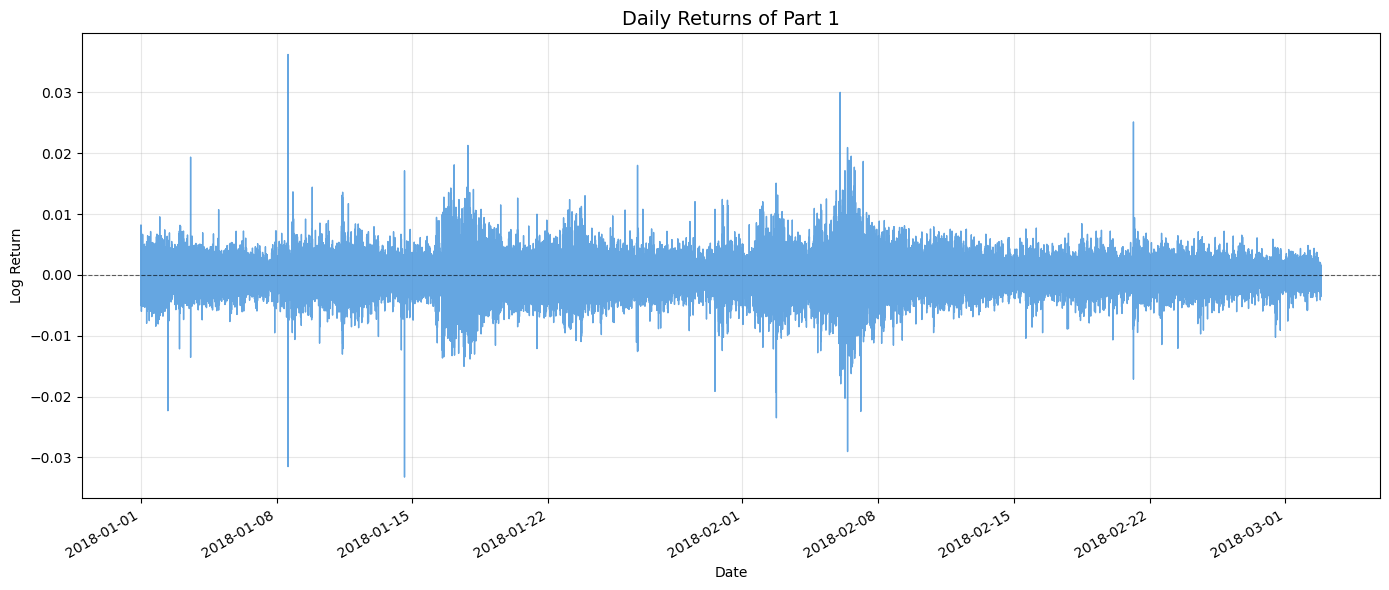

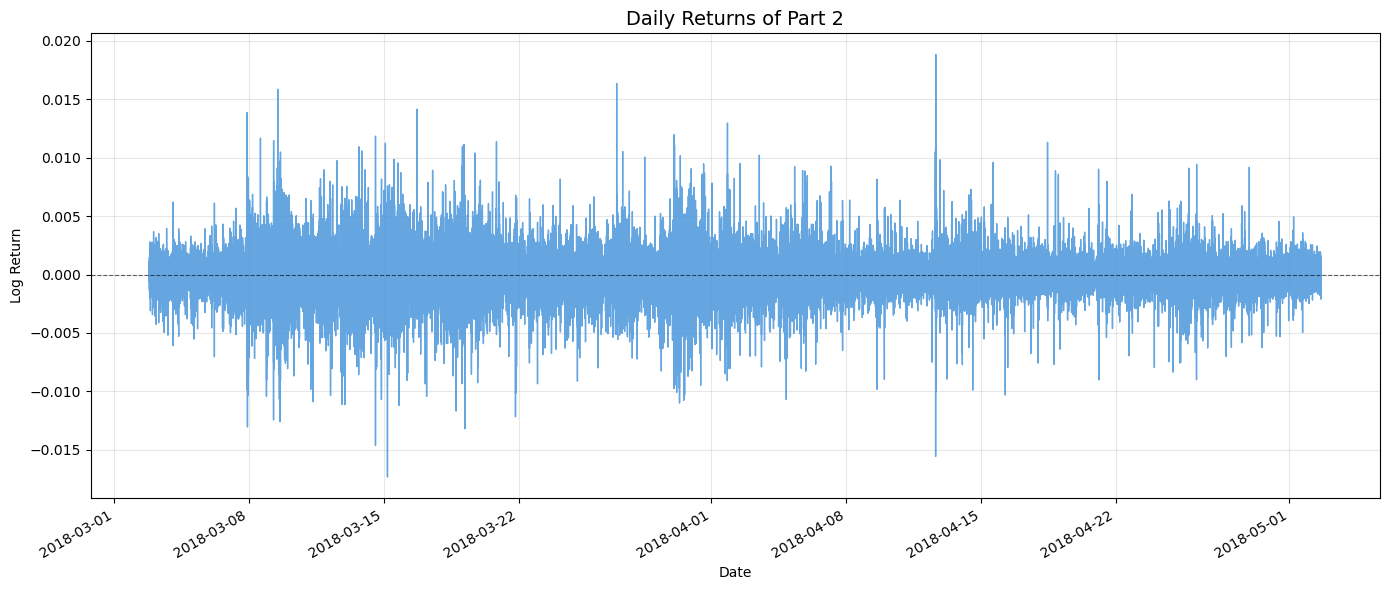

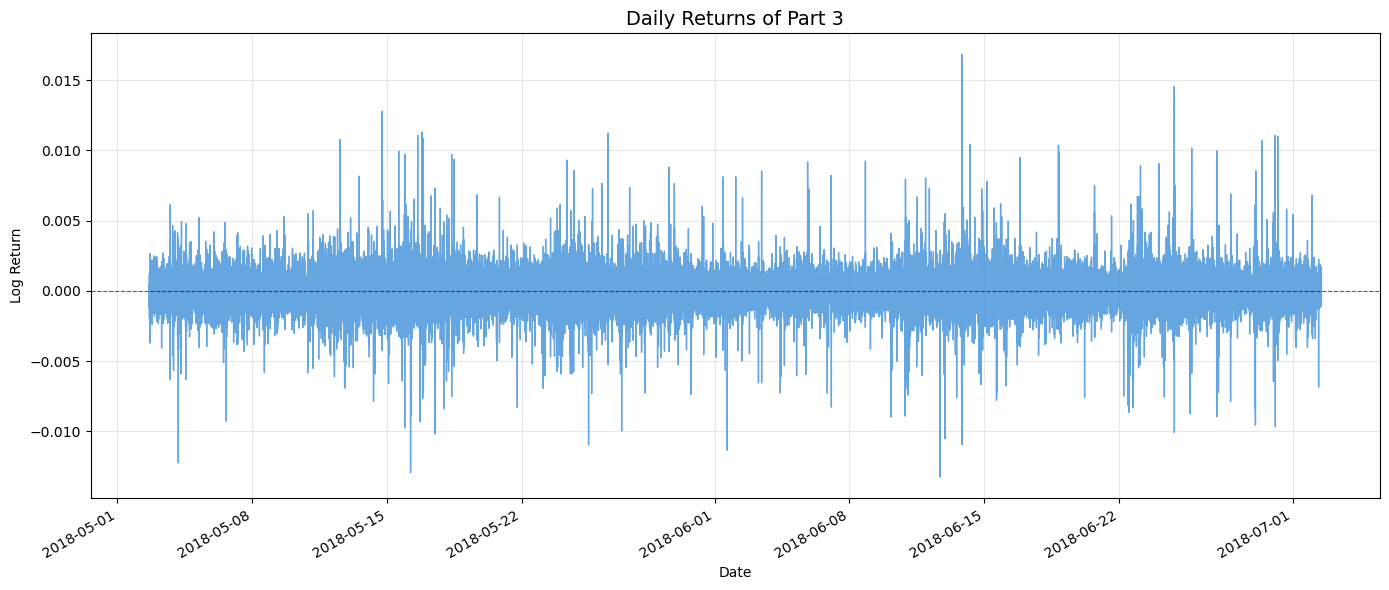

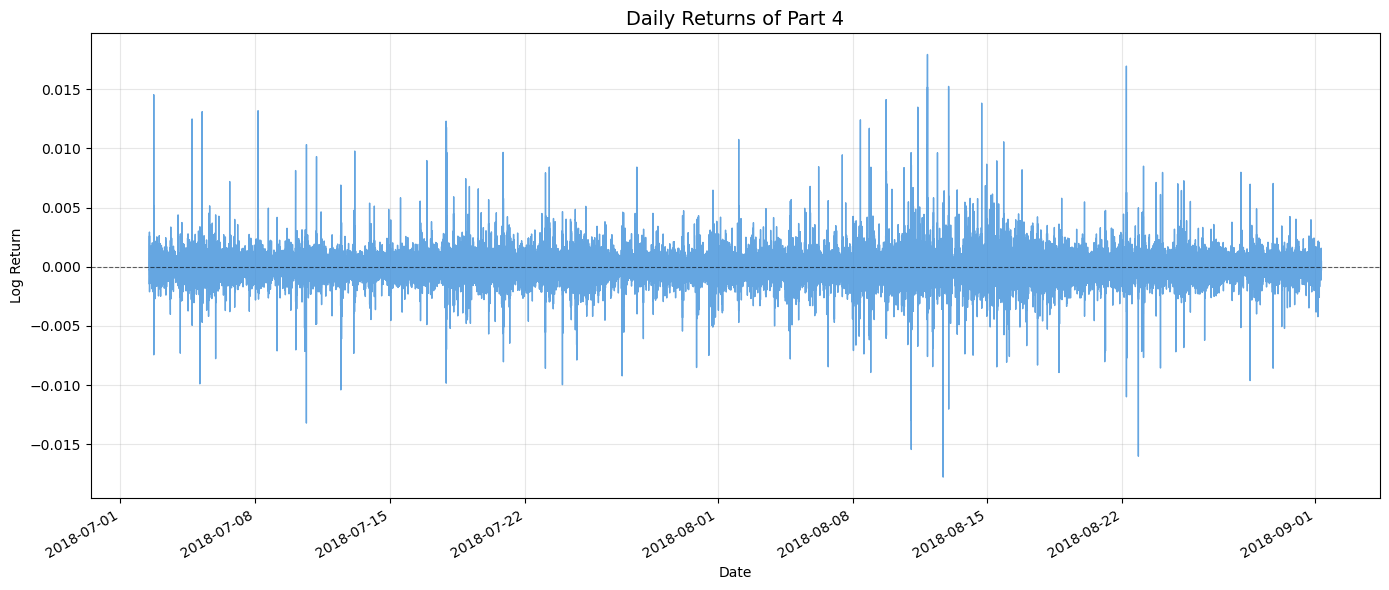

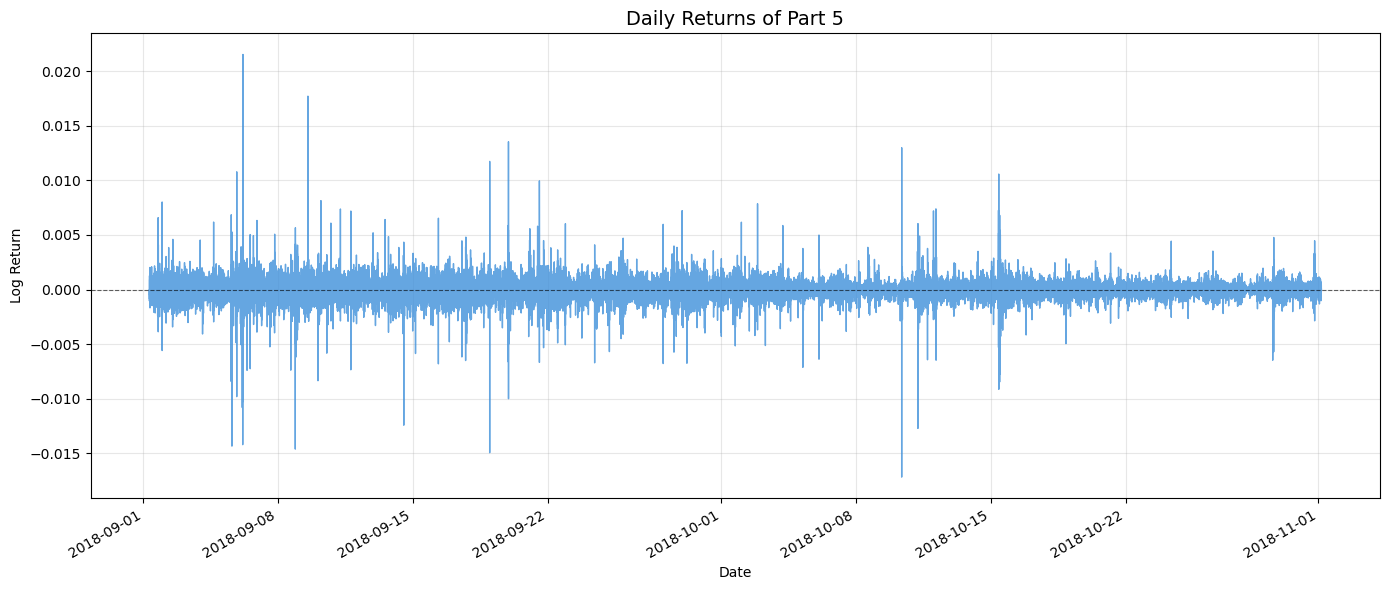

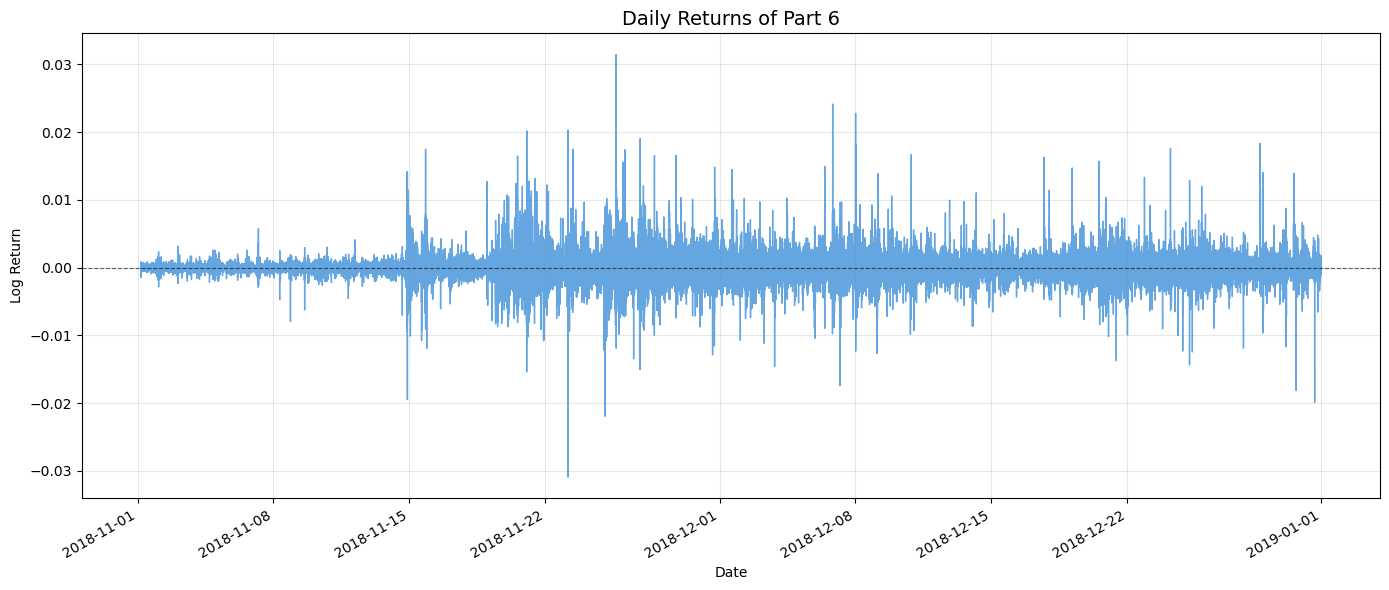

In [8]:
log_return_plot(df1, "Daily Returns of Part 1")
log_return_plot(df2, "Daily Returns of Part 2")
log_return_plot(df3, "Daily Returns of Part 3")
log_return_plot(df4, "Daily Returns of Part 4")
log_return_plot(df5, "Daily Returns of Part 5")
log_return_plot(df6, "Daily Returns of Part 6")

### Plot Histogram of Returns

Understanding the distribution of log returns is essential for analyzing risk, tail behavior, and volatility characteristics, making it a natural next step after inspecting the time-series of returns. Quickly visualize the distribution of BTC log returns. Plots a clean histogram that highlights the shape, spread, and extremity of price movements. Specifically, it:
* Draws a **histogram** with 50 bins to show the empirical return distribution
* Displays the **density**, revealing skewness, kurtosis, and the presence of heavy tails

In [9]:
def histogram_returns(df, title):
    # Compute returns and log returns
    df = log_return(df)
    
    lr = df["log_return"].to_pandas()

    plt.figure(figsize=(14, 6))
    plt.hist(lr, bins=50, density=True, alpha=0.75, edgecolor="black", linewidth=0.5)

    plt.title(title, fontsize=14)
    plt.xlabel("Log Return")
    plt.ylabel("Density")

    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


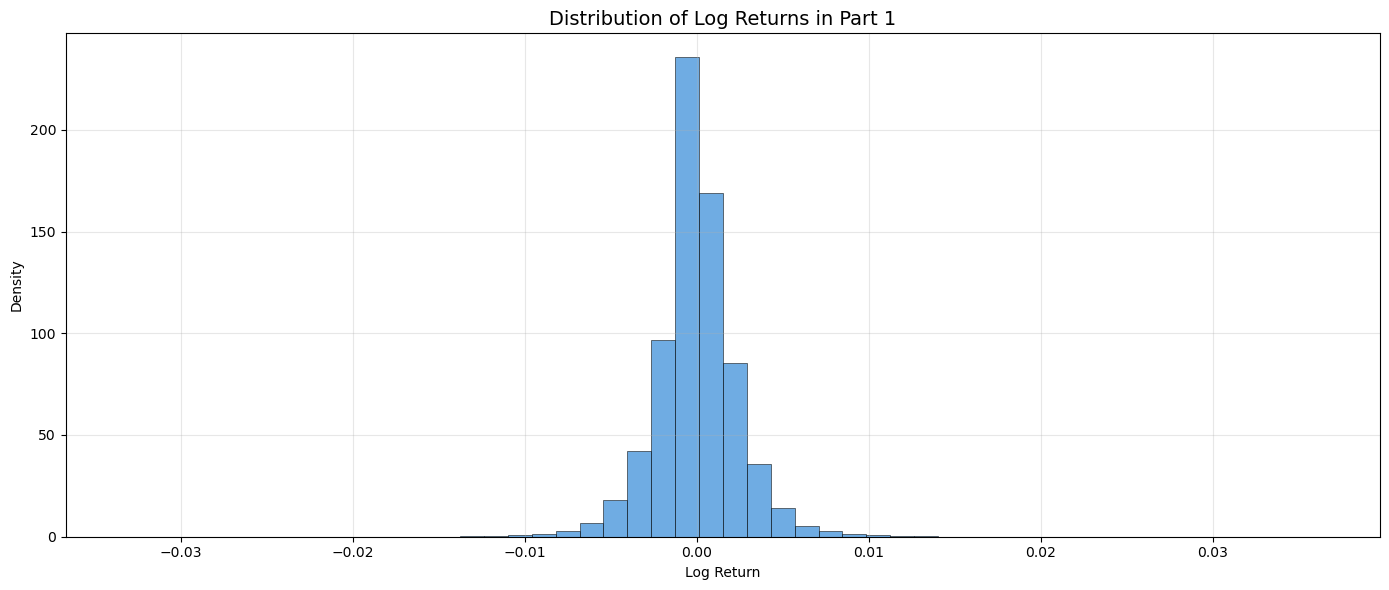

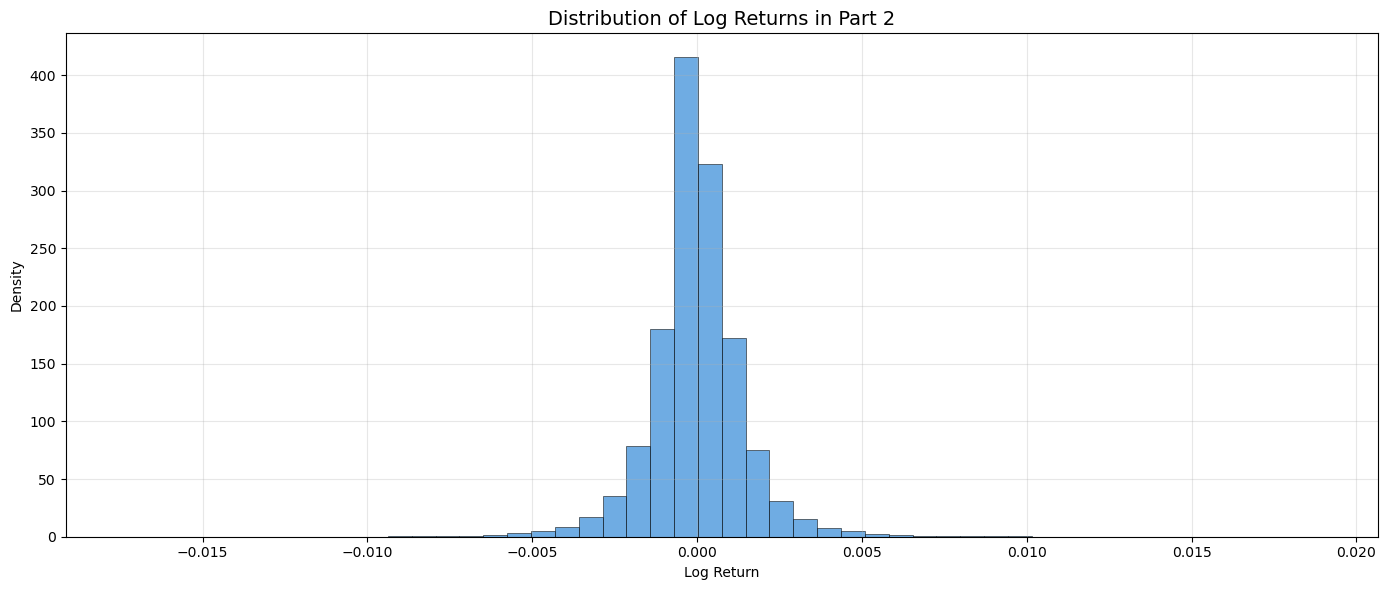

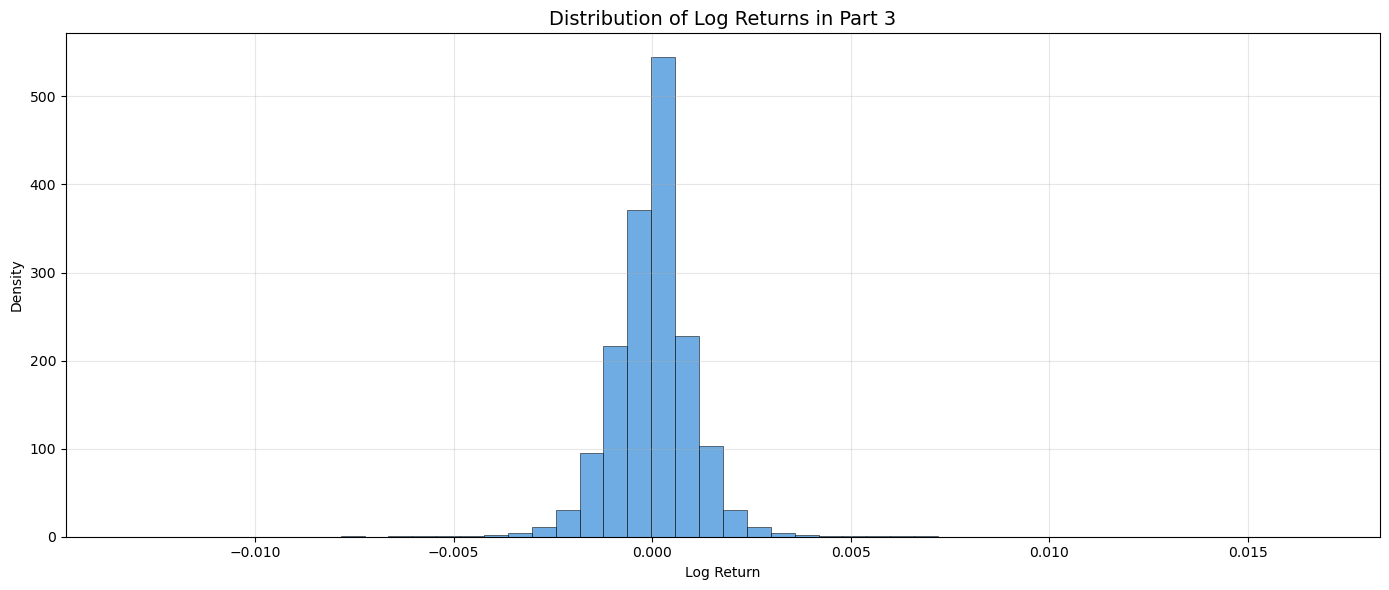

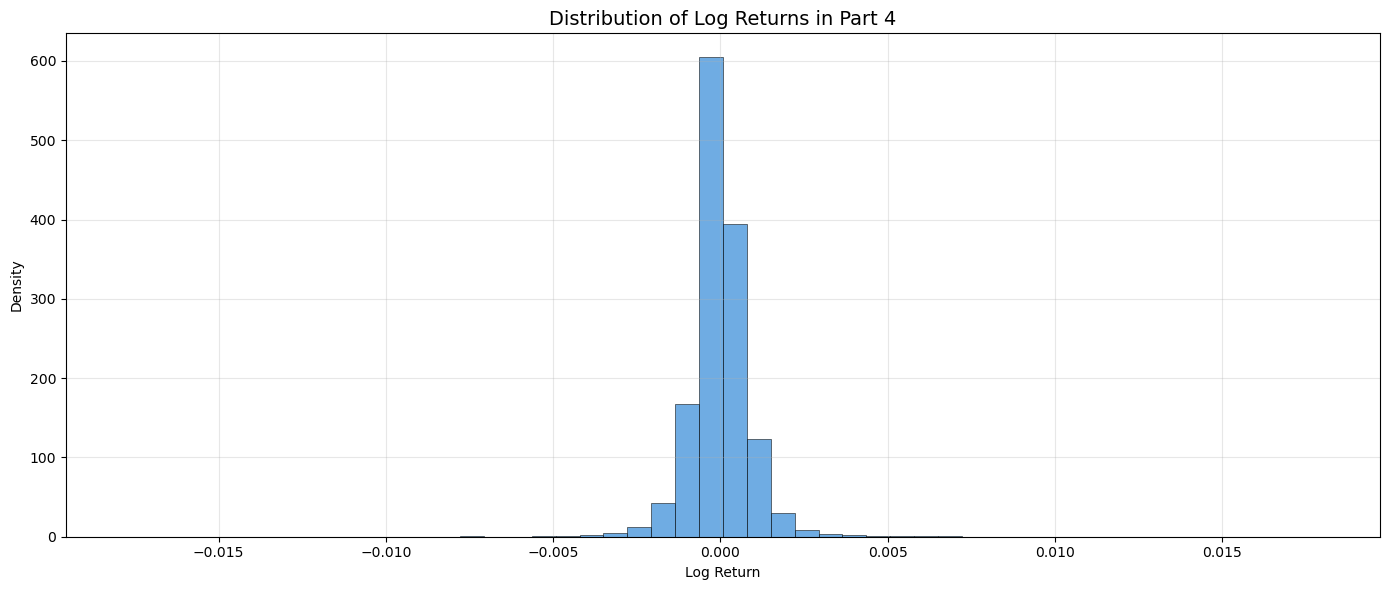

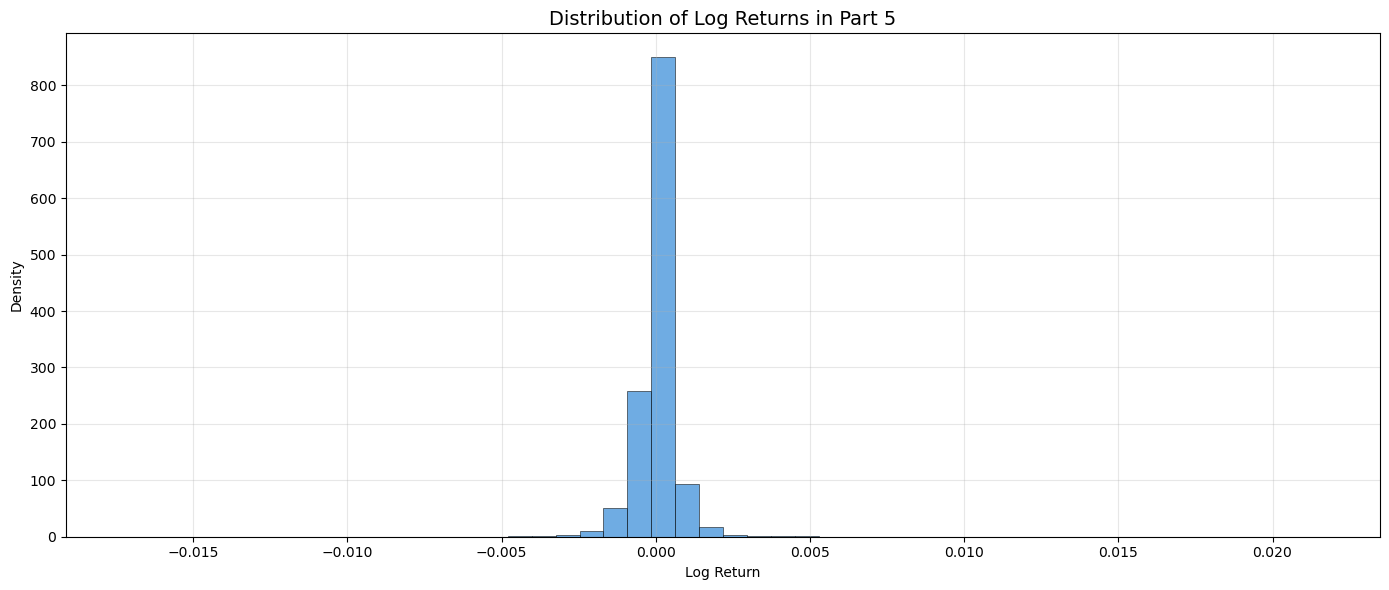

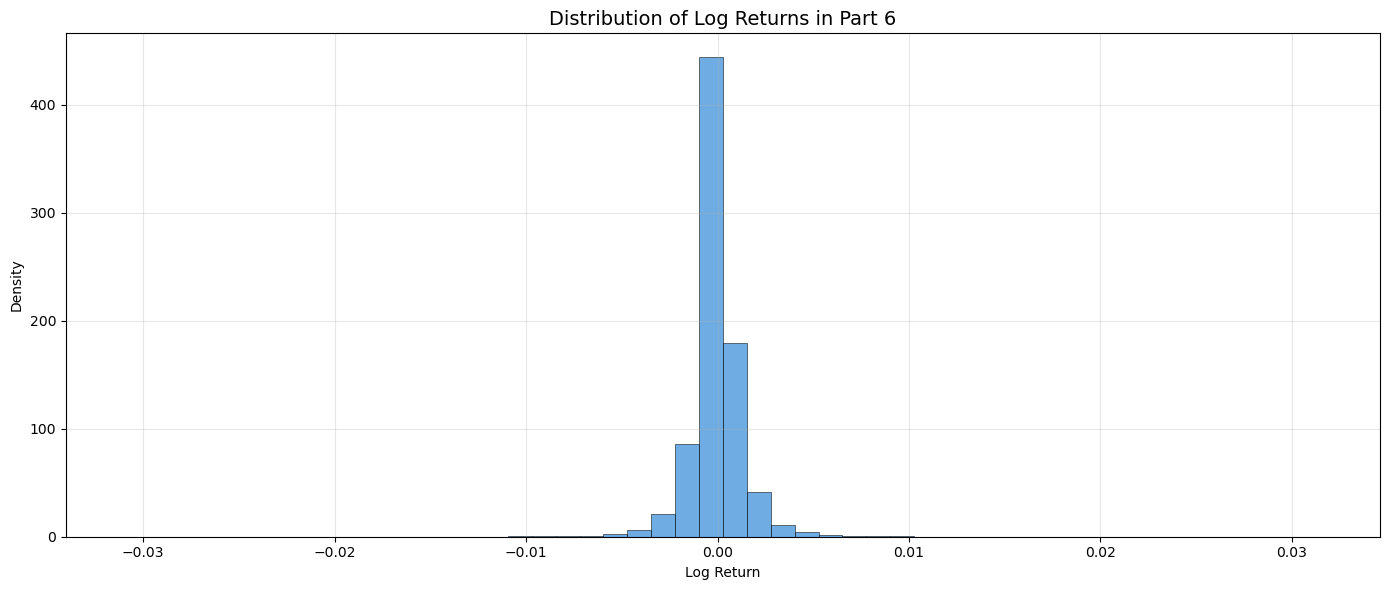

In [10]:
histogram_returns(df1, "Distribution of Log Returns in Part 1")
histogram_returns(df2, "Distribution of Log Returns in Part 2")
histogram_returns(df3, "Distribution of Log Returns in Part 3")
histogram_returns(df4, "Distribution of Log Returns in Part 4")
histogram_returns(df5, "Distribution of Log Returns in Part 5")
histogram_returns(df6, "Distribution of Log Returns in Part 6")

### Plot Rolling Volatility of 30 Days

Volatility is a core characteristic of BTC price behavior, and examining rolling volatility helps reveal periods of market stress, regime shifts, and changes in risk over time. This makes rolling volatility a natural follow-up after studying returns and their distribution. Quickly visualize the 30-day rolling volatility of BTC log returns. Plots a clean time-series chart showing how volatility evolves. Specifically, it:

* Computes log returns and then calculates a **30-day rolling standard deviation** as a volatility measure
* Draws a **line plot** to highlight volatility clustering and long-term shifts in price variability


In [11]:
def rolling_vol_plot(df, title):
    # Compute log returns first
    df = log_return(df)

    # Compute 30-day rolling volatility
    df = df.with_columns([
        pl.col("log_return").rolling_std(window_size=30).alias("rolling_vol")
    ])
    
    # Drop null rows
    df_clean = df.drop_nulls(subset=["rolling_vol"])
    
    # Extract data for plotting
    ts = df_clean["timestamp"].to_pandas()
    rolling_vol = df_clean["rolling_vol"].to_pandas()

    # Plot with consistent style
    plt.figure(figsize=(14, 6))
    plt.plot(ts, rolling_vol, linewidth=1, alpha=0.8)
    plt.title(title, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Rolling Volatility (30-day)")
    plt.grid(True, alpha=0.3)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()


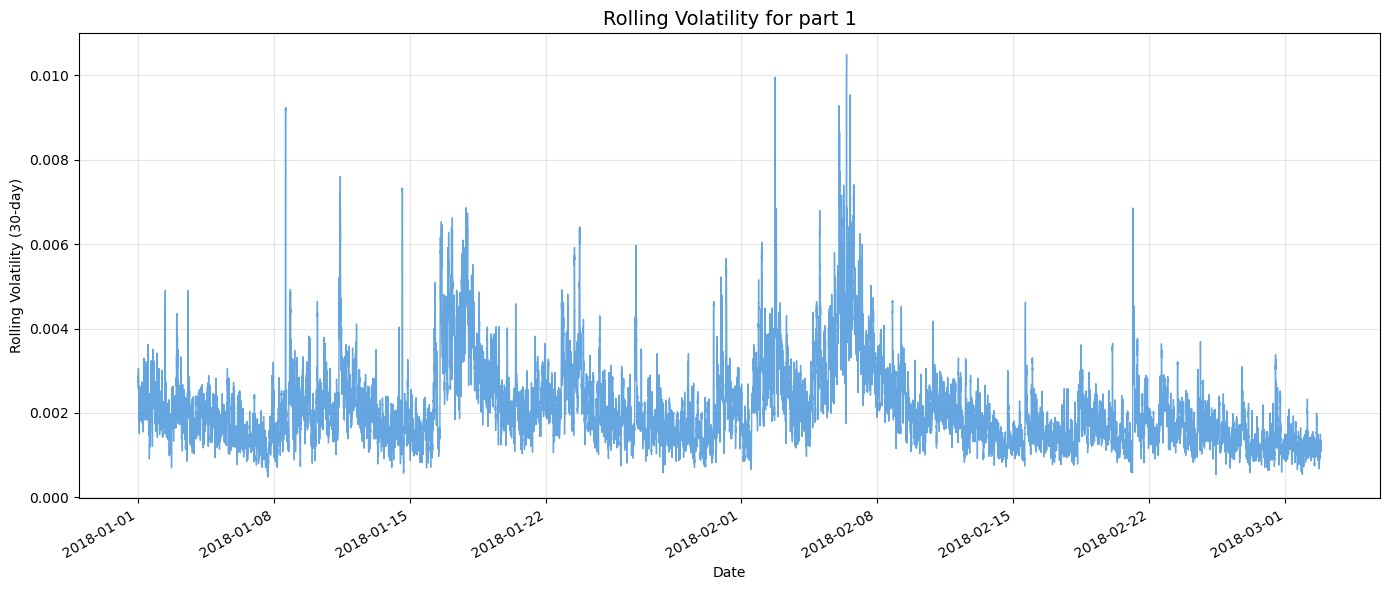

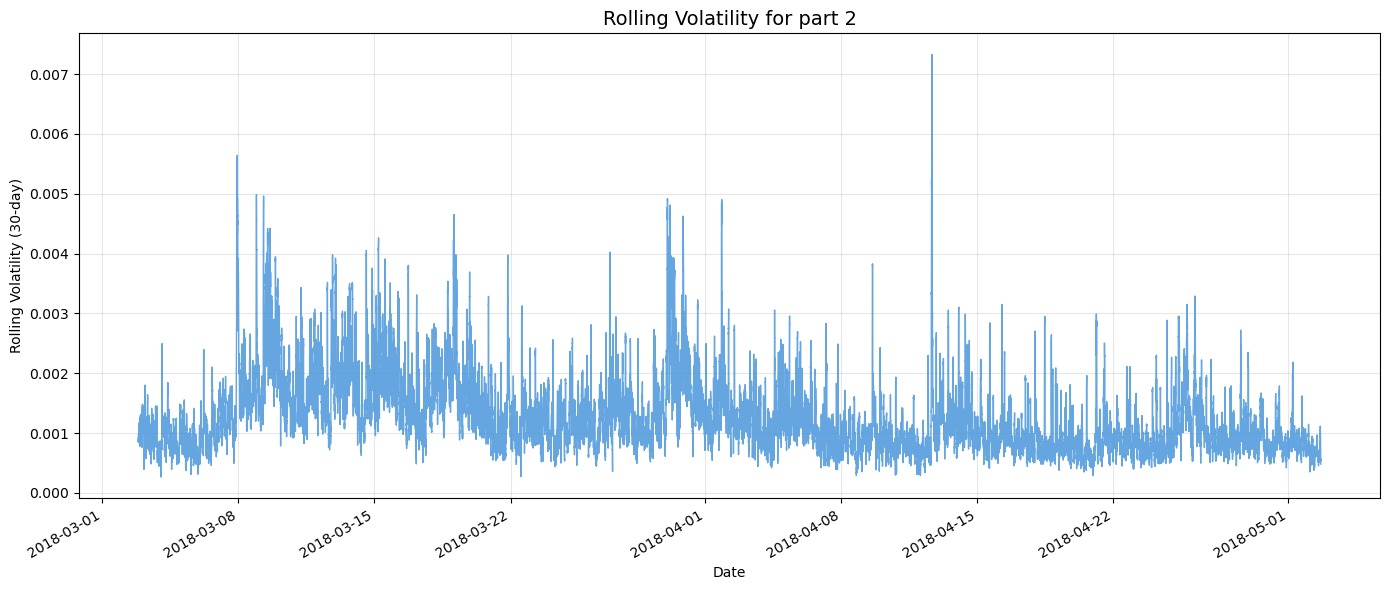

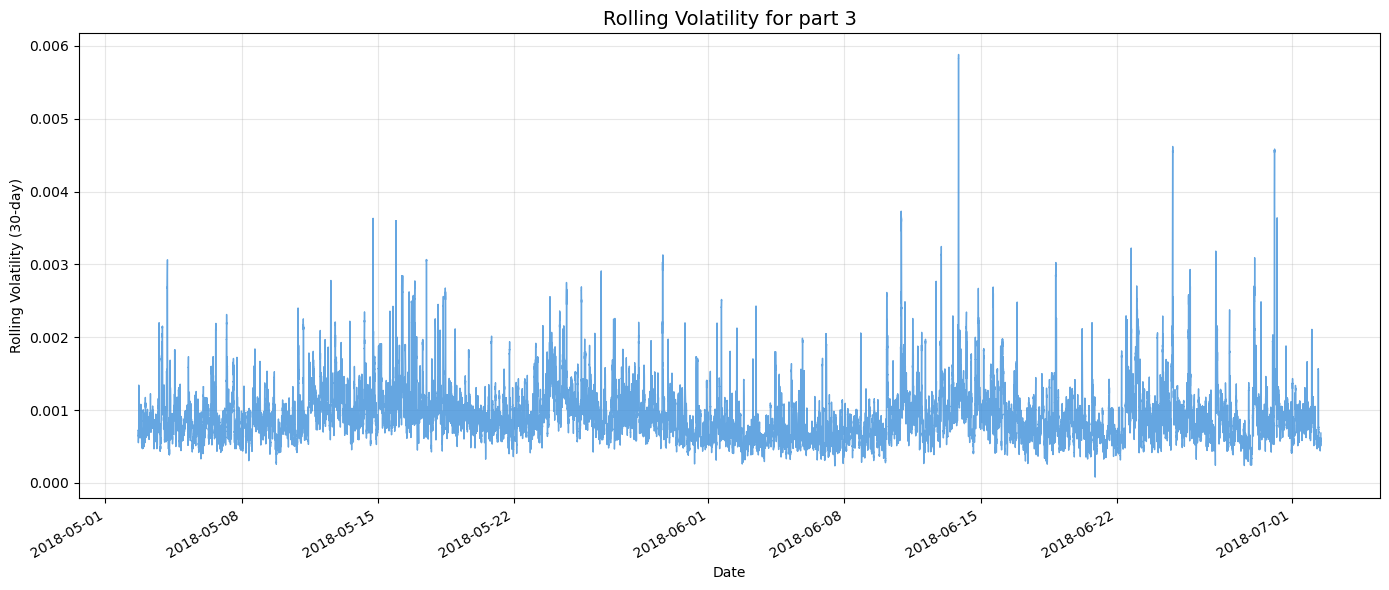

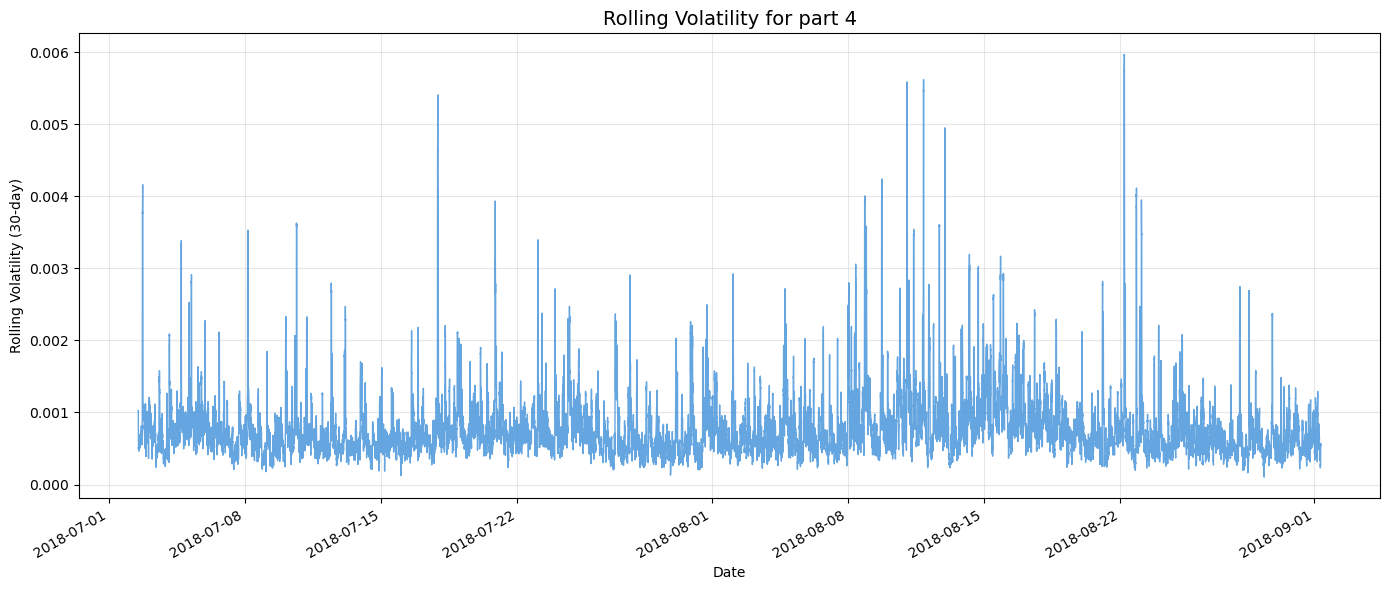

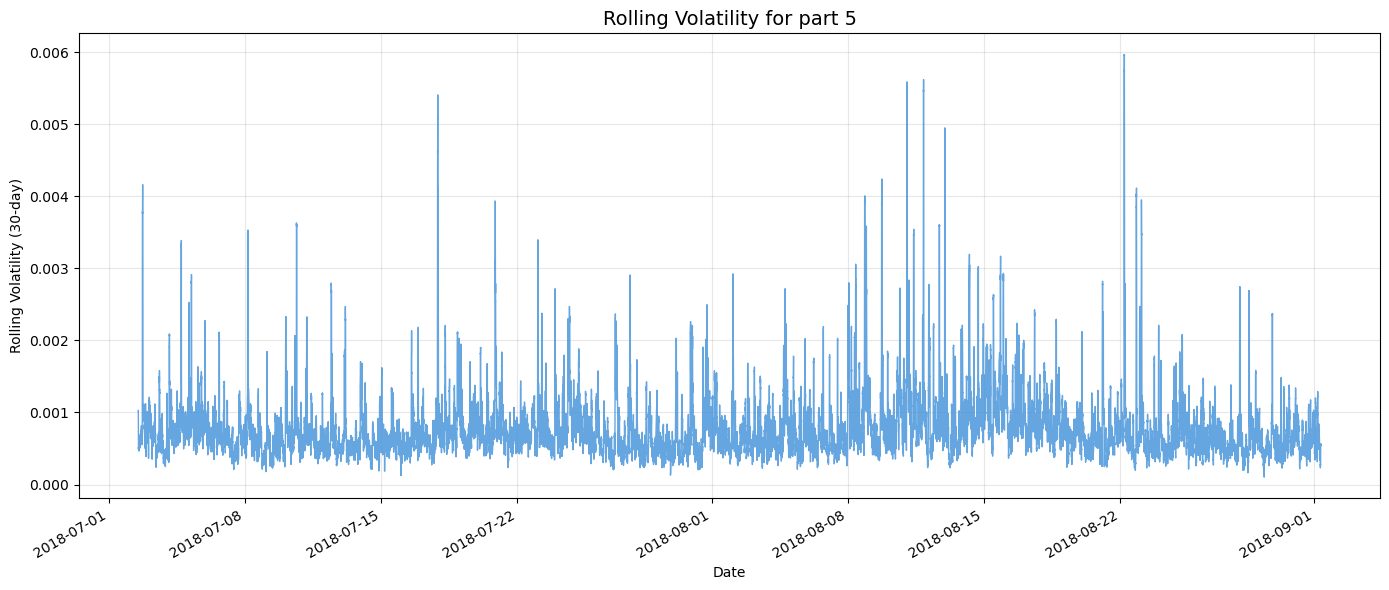

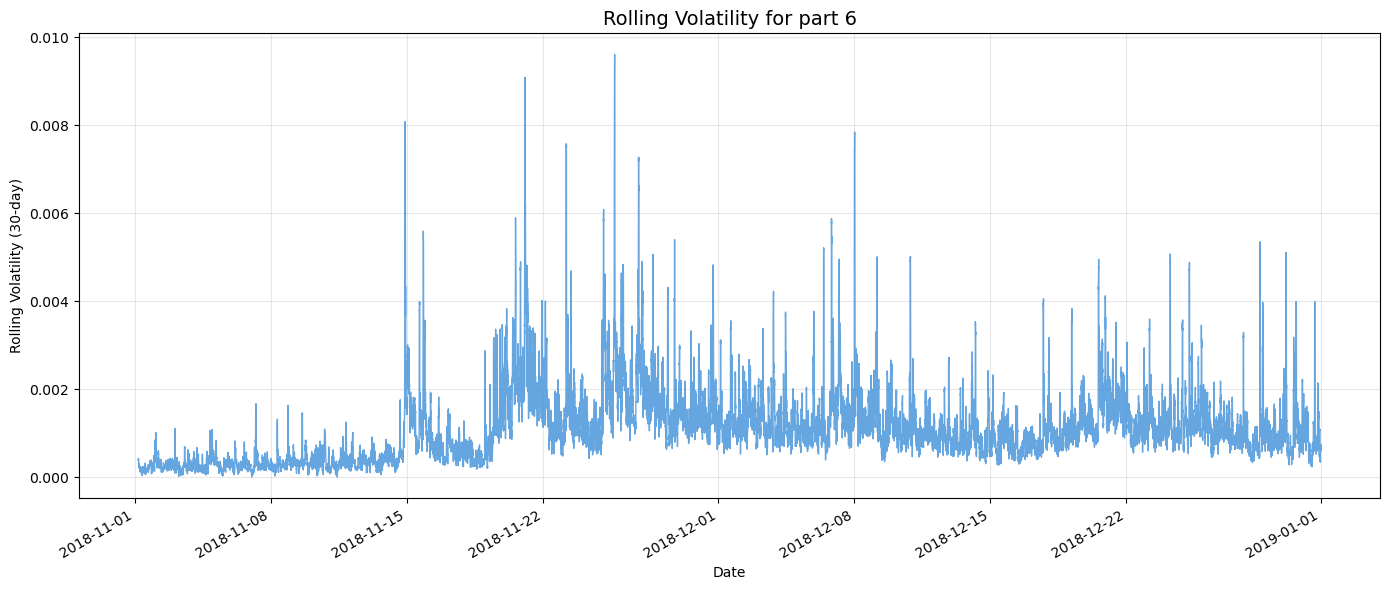

In [12]:
rolling_vol_plot(df1, "Rolling Volatility for part 1")
rolling_vol_plot(df2, "Rolling Volatility for part 2")
rolling_vol_plot(df3, "Rolling Volatility for part 3")
rolling_vol_plot(df4, "Rolling Volatility for part 4")
rolling_vol_plot(df4, "Rolling Volatility for part 5")
rolling_vol_plot(df6, "Rolling Volatility for part 6")

### Volume Analysis

Trading volume often reflects market participation, liquidity, and the strength behind price movements, making it a natural signal to inspect alongside returns. Understanding how volume evolves over time and how it relates to returns helps reveal periods of heightened activity, potential breakouts, or abnormal market behavior. Quickly analyze BTC trading volume and its relationship with daily returns. Generates both a time-series plot of trading volume and a scatter plot comparing volume to returns. Specifically, it:

* Plots a **volume time-series** to highlight shifts in market activity and liquidity
* Produces a **scatter plot of volume vs. returns** to reveal whether large price moves tend to coincide with high trading activity


In [13]:
def volume_analysis(df, title):
    df = log_return(df)

    # Ensure volume and return have no nulls
    df_clean = df.drop_nulls(subset=["volume", "return"])
    
    # Extract aligned timestamp + volume + return
    ts = df_clean["timestamp"].to_pandas()
    volume = df_clean["volume"].to_numpy()
    returns = df_clean["return"].to_numpy()
    
    # Plot 1: Volume time series
    plt.figure(figsize=(14, 6))
    plt.plot(ts, volume, linewidth=1, alpha=0.8, color="orange")

    plt.title("Daily BTC Volume", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Volume")

    plt.grid(True, alpha=0.3)
    plt.gcf().autofmt_xdate()
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Volume vs Returns (Scatter)
    plt.figure(figsize=(14, 6))
    plt.scatter(volume, returns, alpha=0.5)

    plt.title(title, fontsize=14)
    plt.xlabel("Volume")
    plt.ylabel("Return")

    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


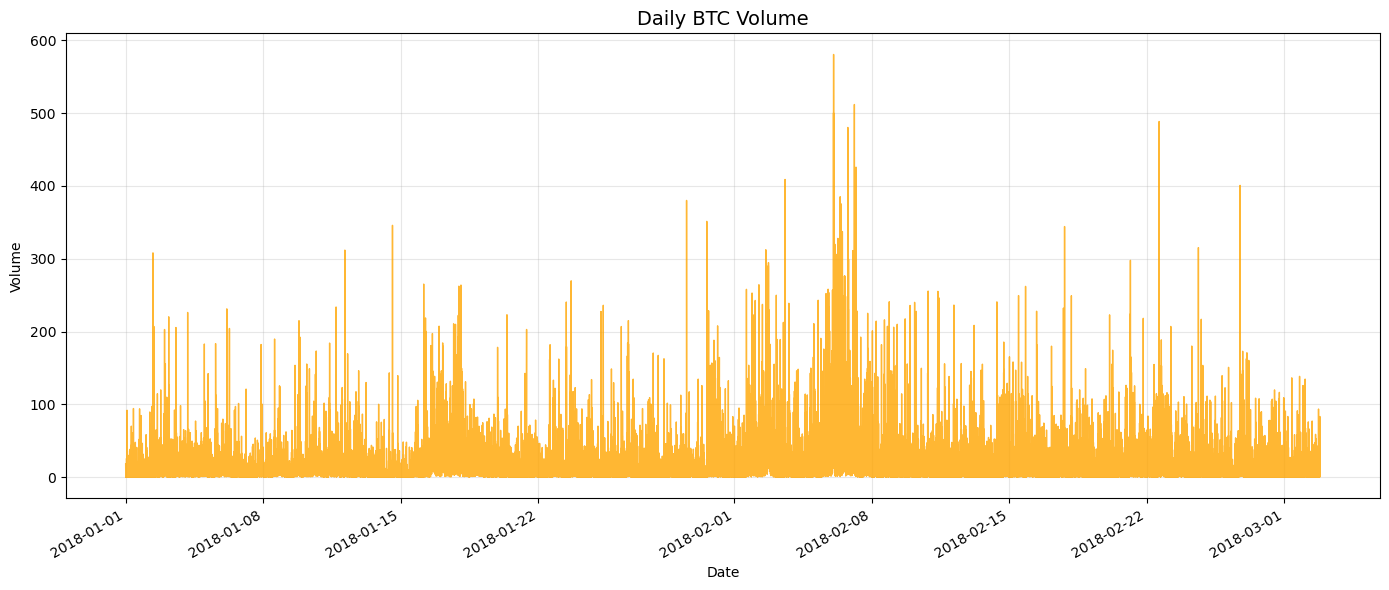

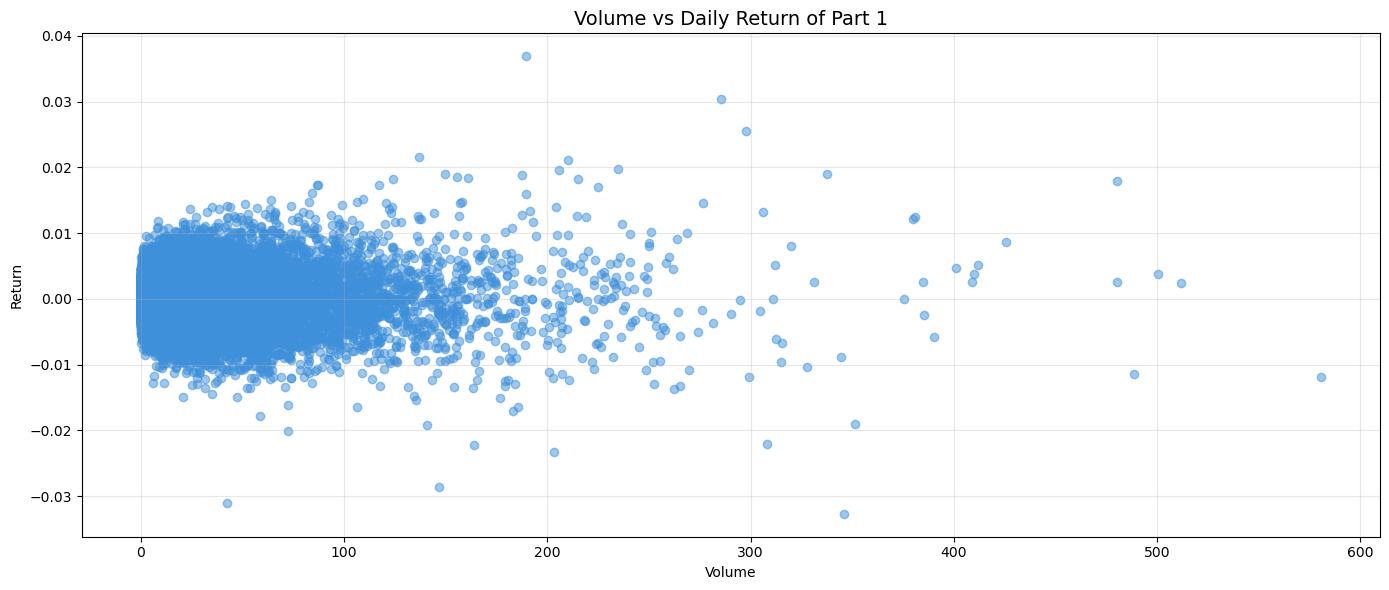

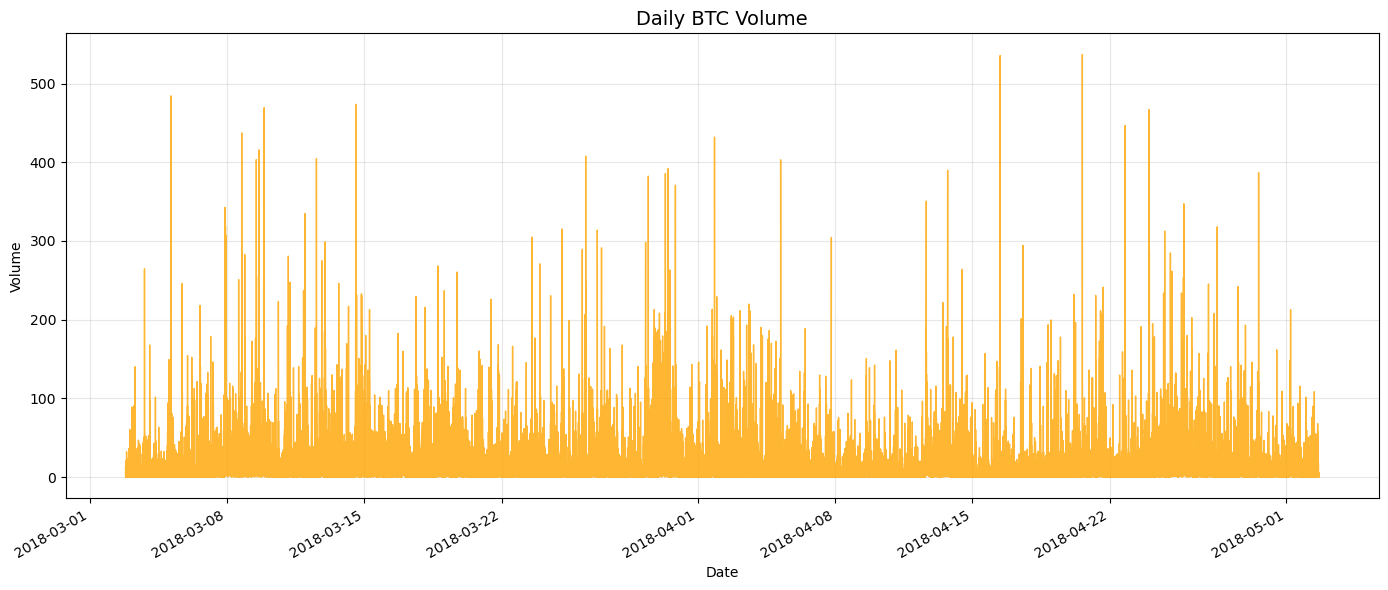

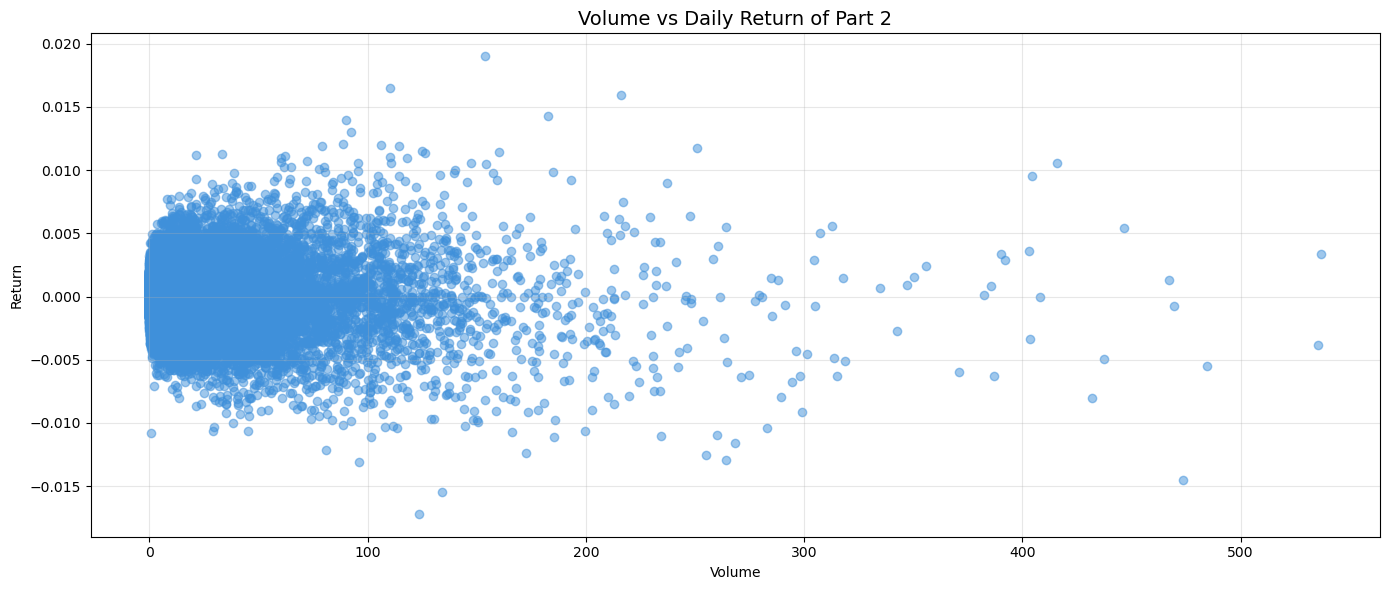

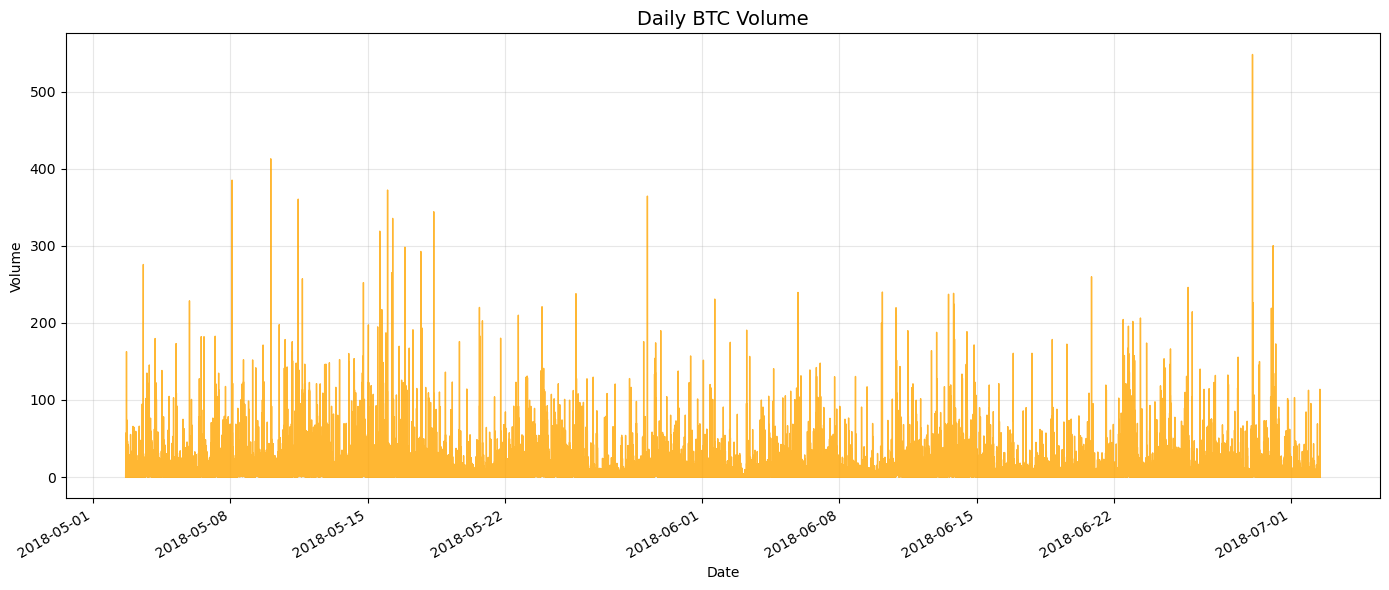

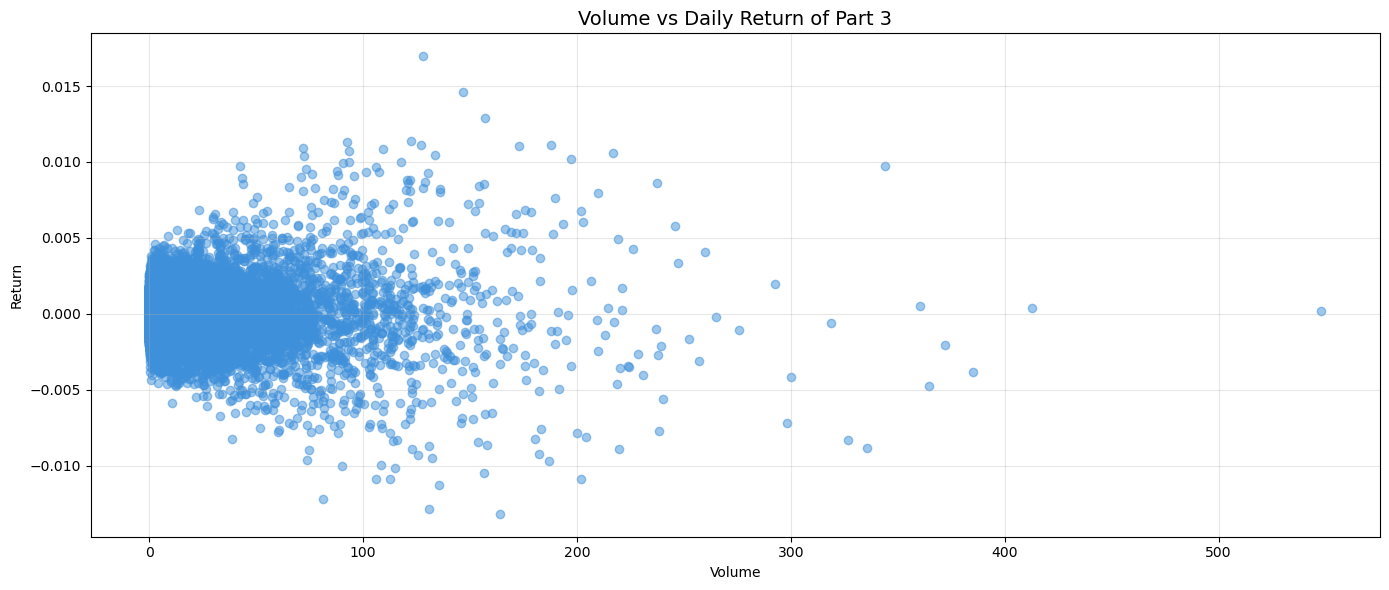

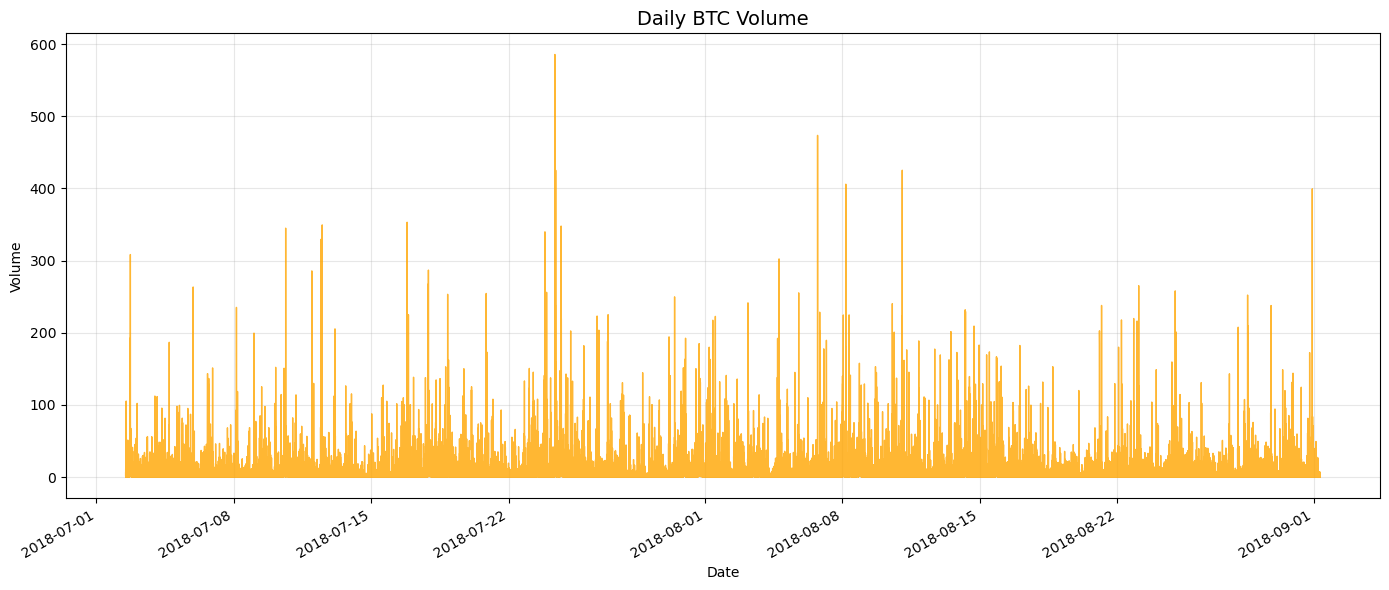

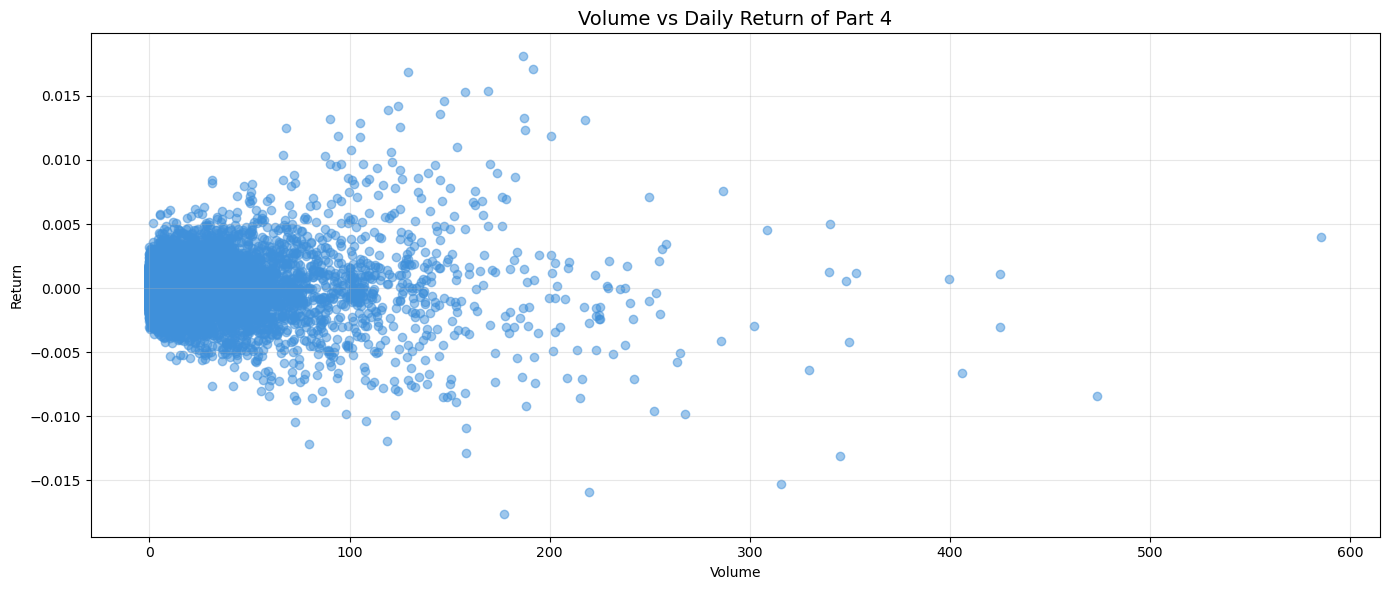

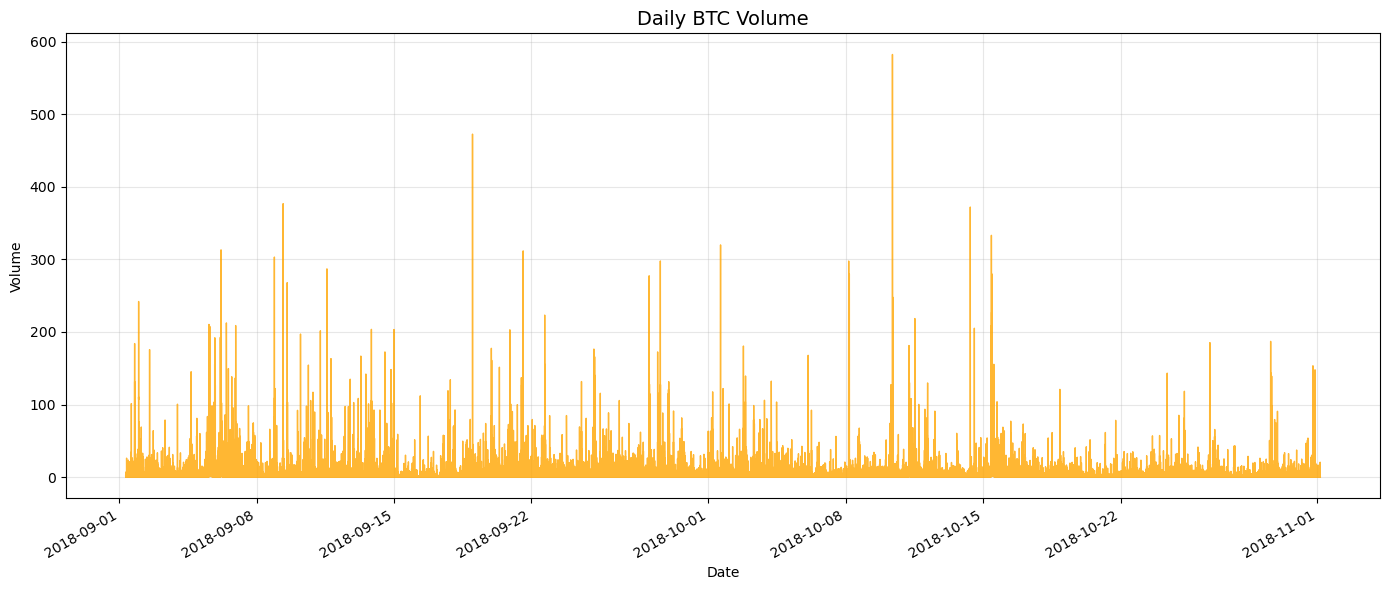

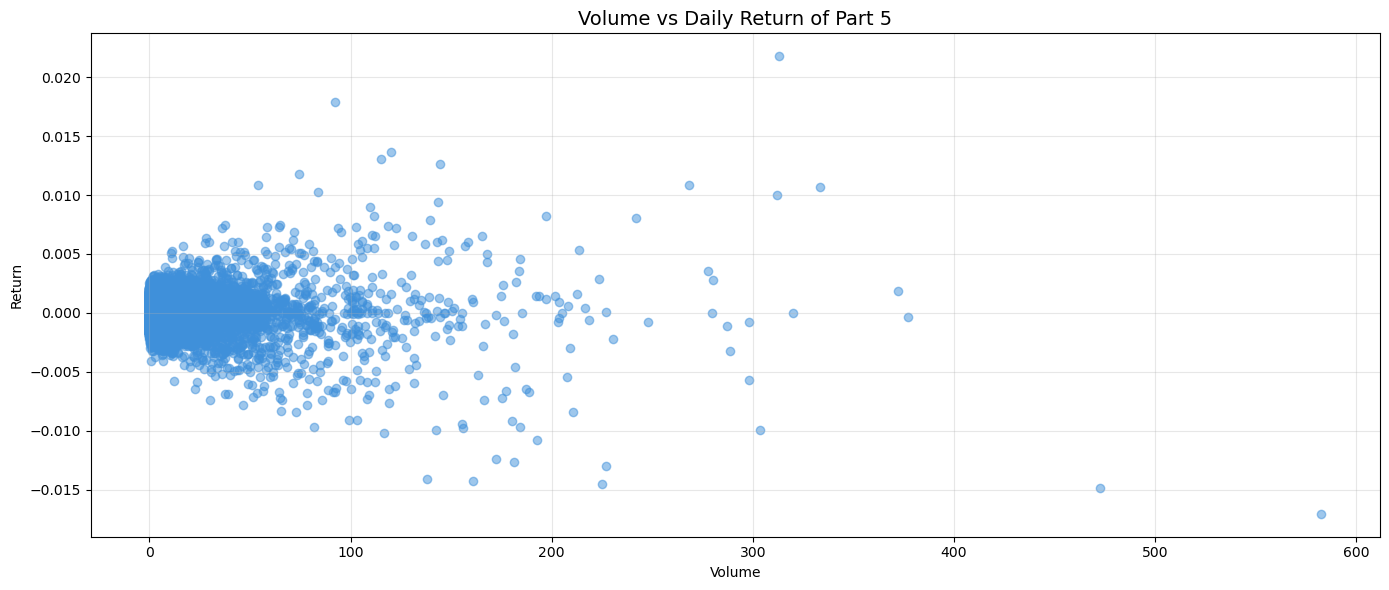

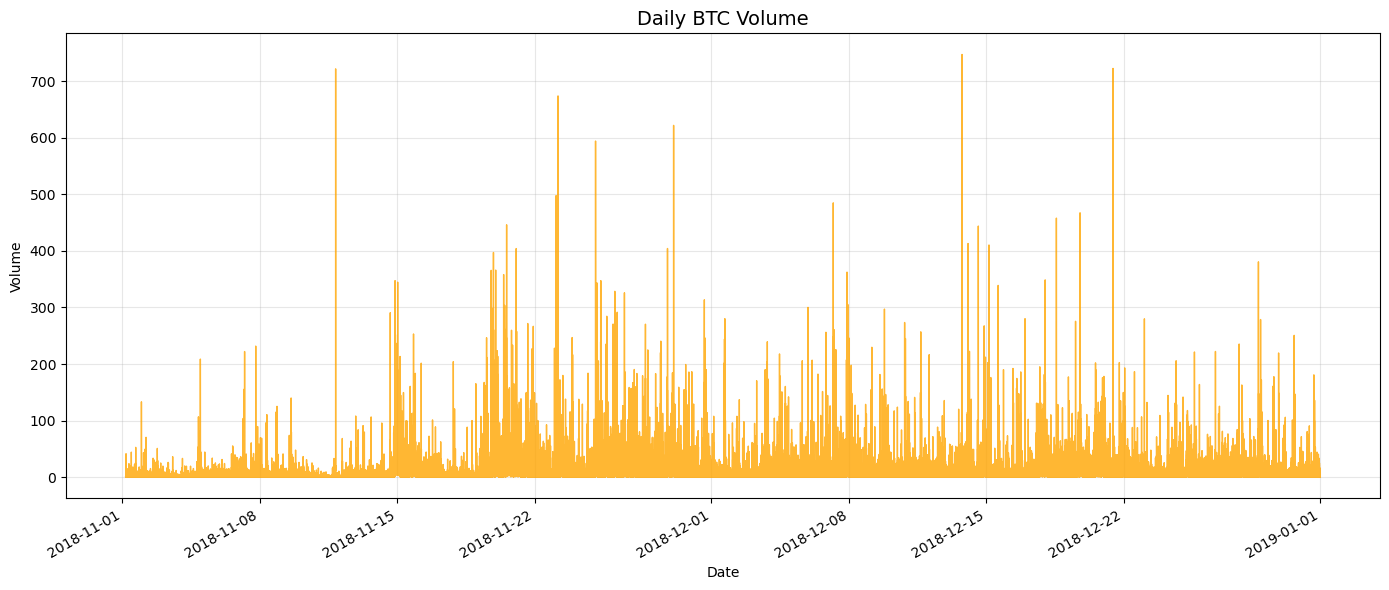

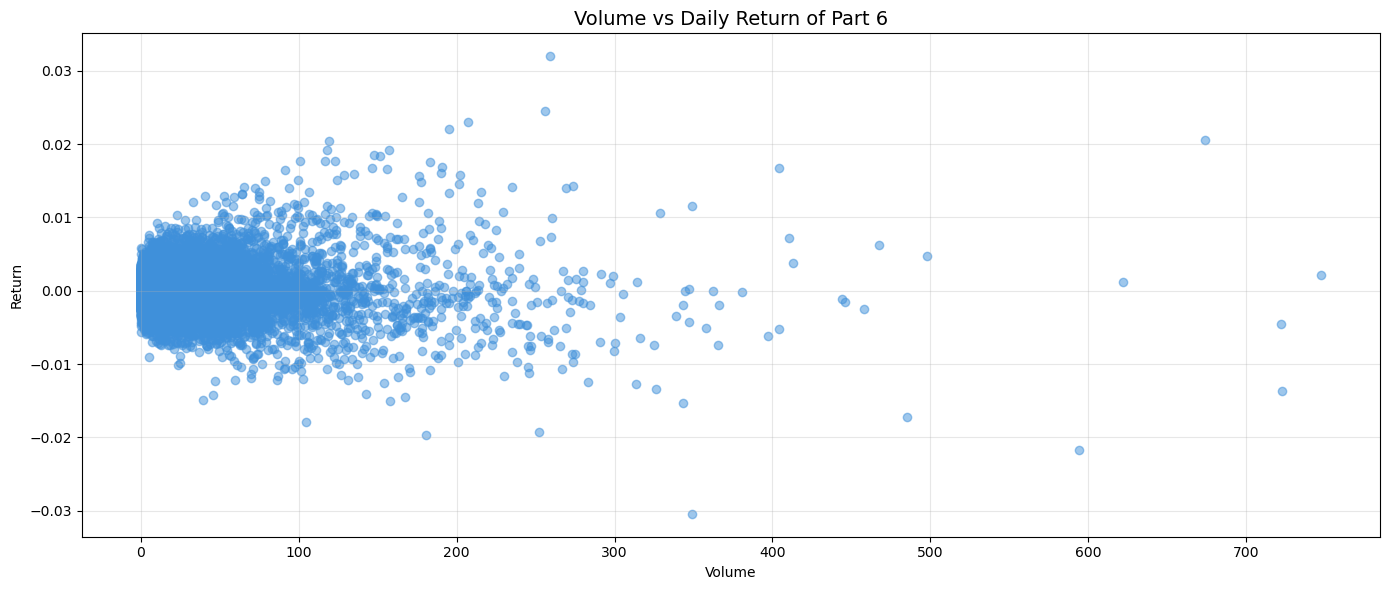

In [14]:
volume_analysis(df1, "Volume vs Daily Return of Part 1")
volume_analysis(df2, "Volume vs Daily Return of Part 2")
volume_analysis(df3, "Volume vs Daily Return of Part 3")
volume_analysis(df4, "Volume vs Daily Return of Part 4")
volume_analysis(df5, "Volume vs Daily Return of Part 5")
volume_analysis(df6, "Volume vs Daily Return of Part 6")

### Correlation Analysis

Correlation analysis helps reveal how different market variables move together, making it a natural step after examining individual price, return, and volume behaviors. Understanding these relationships provides insight into market structure—for example, how strongly returns relate to volatility, or how price components interact. Quickly visualize the correlation structure of key BTC features. Plots a clean heatmap of correlations across price, volume, and return-related variables. Specifically, it:

* Computes a **correlation matrix** and displays it using a color-coded heatmap


In [15]:
def corr_analysis(df, title):
    df = log_return(df)

    # Select numeric columns for correlation
    corr_df = df.select([
        "open", "high", "low", "close",
        "volume", "return", "log_return"
    ]).to_pandas()

    # Plot
    plt.figure(figsize=(14, 6))
    sns.heatmap(
        corr_df.corr(),
        annot=True,
        cmap="coolwarm",
        linewidths=0.5,
        linecolor="white",
        square=True,
        cbar=True
    )
    plt.gcf().autofmt_xdate()
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()


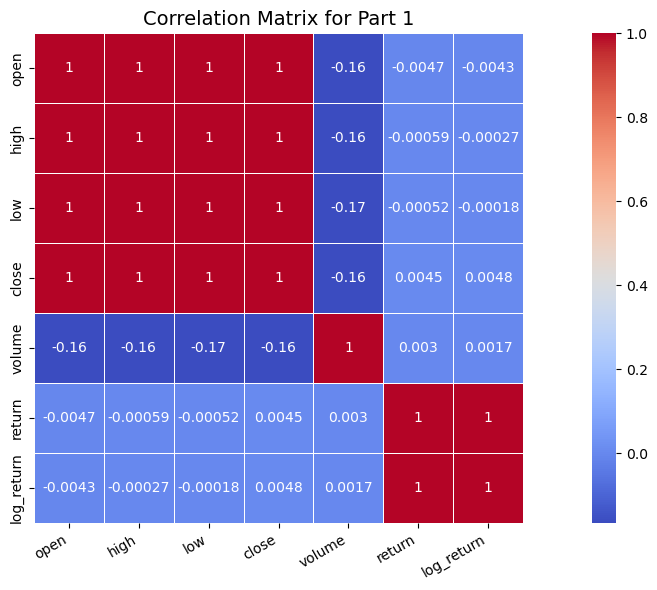

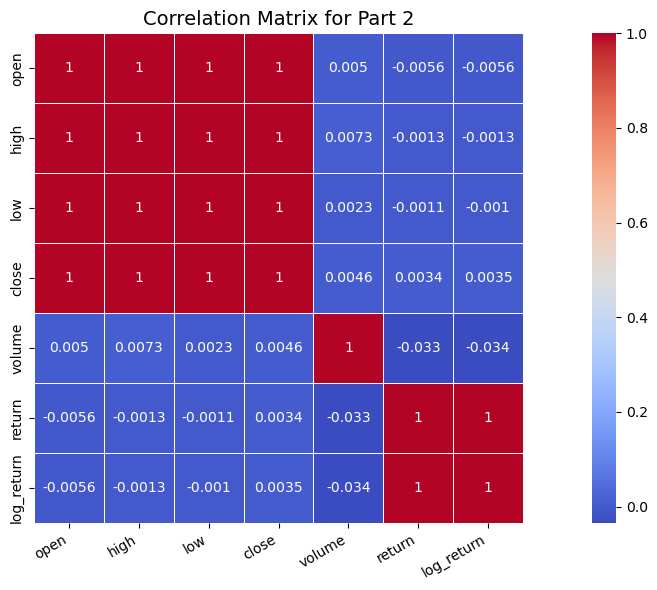

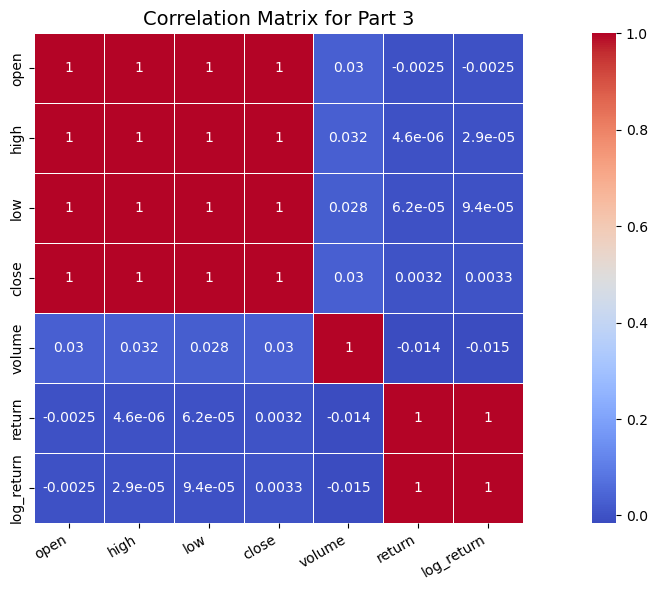

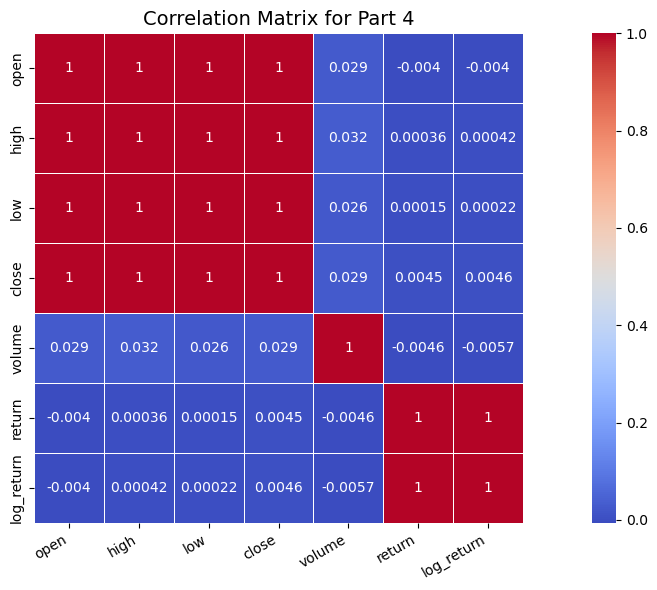

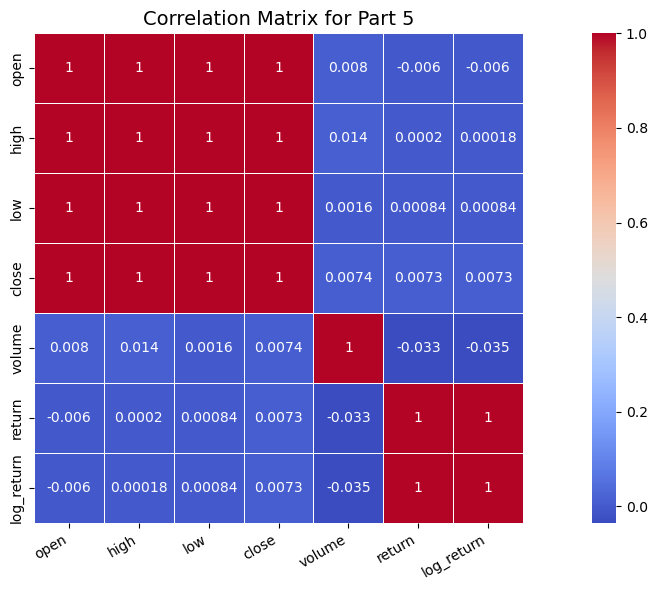

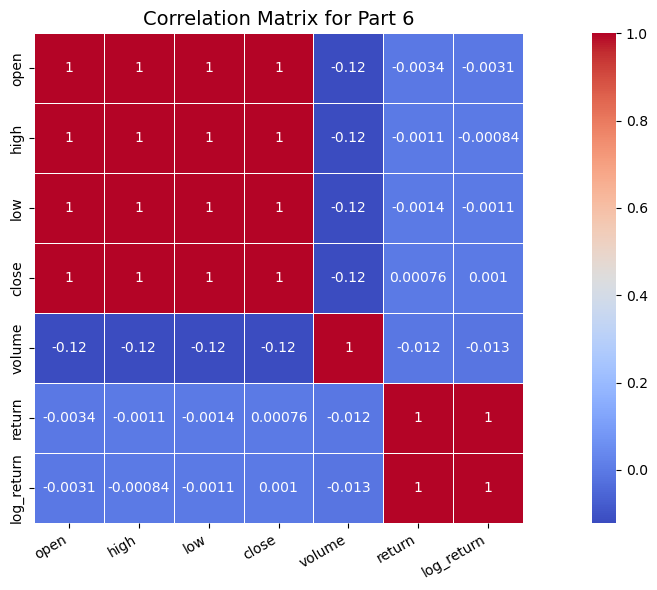

In [16]:
corr_analysis(df1, "Correlation Matrix for Part 1")
corr_analysis(df2, "Correlation Matrix for Part 2")
corr_analysis(df3, "Correlation Matrix for Part 3")
corr_analysis(df4, "Correlation Matrix for Part 4")
corr_analysis(df5, "Correlation Matrix for Part 5")
corr_analysis(df6, "Correlation Matrix for Part 6")

### Price Range Features

The daily high–low price range captures intraday volatility and market uncertainty, making it a natural signal to inspect alongside returns and rolling volatility. Examining how the price range evolves over time helps reveal periods of expansion, contraction, and sudden market turbulence. Quickly visualize the percentage high–low range for BTC. Plots a clean time-series chart of the daily intraday range as a percentage of the opening price. Specifically, it:

* Computes both the **absolute** high–low range and the **percentage** range relative to the opening price
* Draws a **line plot** of daily range (%) to highlight spikes in intraday volatility


In [17]:
def price_range(df, title):
    # Convert timestamp for plotting
    ts = df["timestamp"].to_pandas()

    # Compute absolute and percentage high-low range
    df = df.with_columns([
        (pl.col("high") - pl.col("low")).alias("range"),
        ((pl.col("high") - pl.col("low")) / pl.col("open")).alias("range_pct")
    ])

    # Extract range_pct as Pandas series
    range_pct = df["range_pct"].to_pandas()

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(ts, range_pct, linewidth=1, alpha=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Daily Range (%)")

    # Gray grid for modern style
    plt.grid(True, alpha=0.3)

    # Date formatting
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


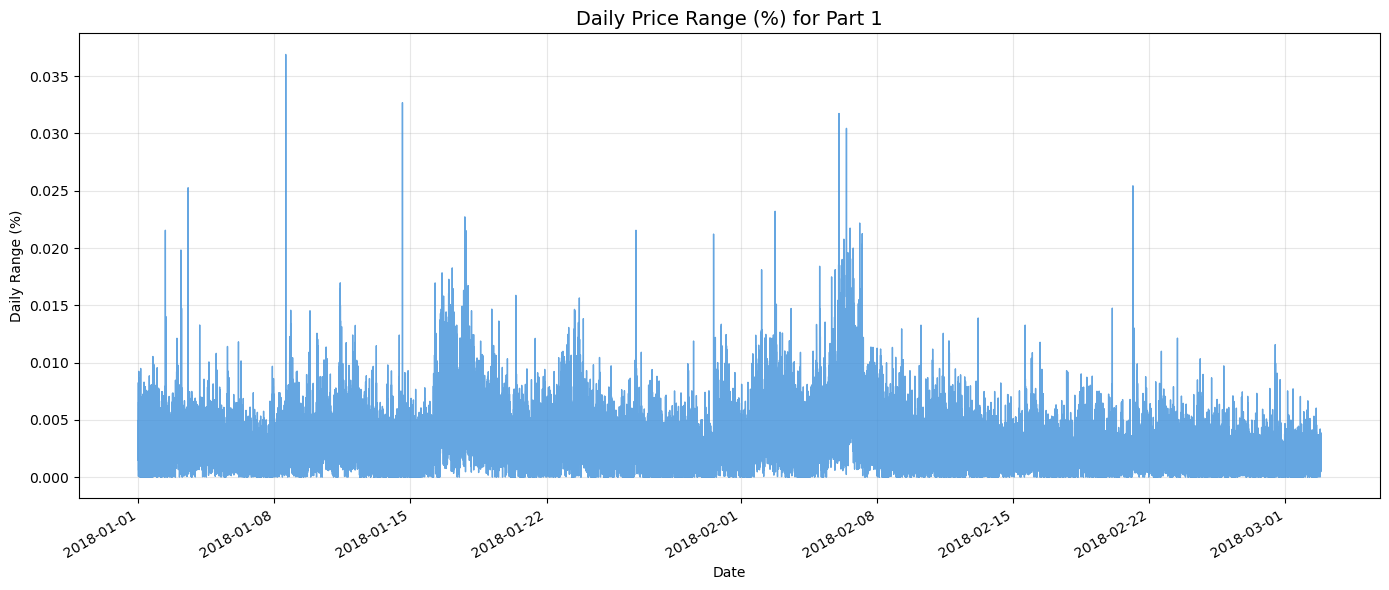

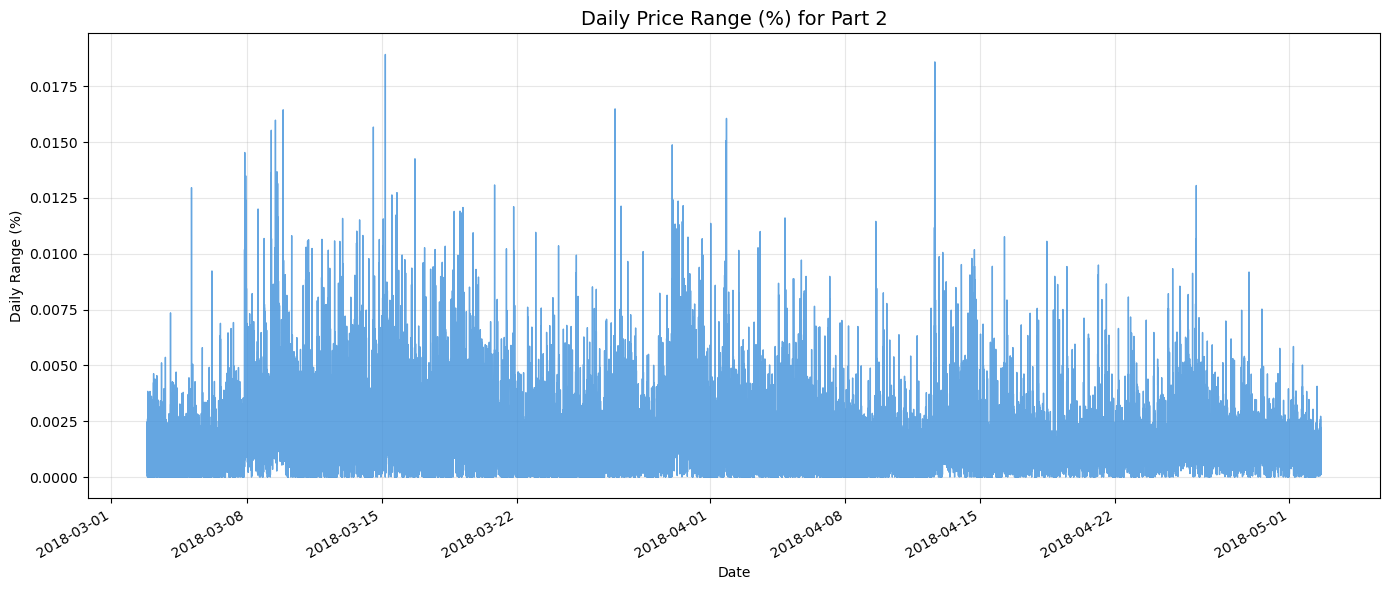

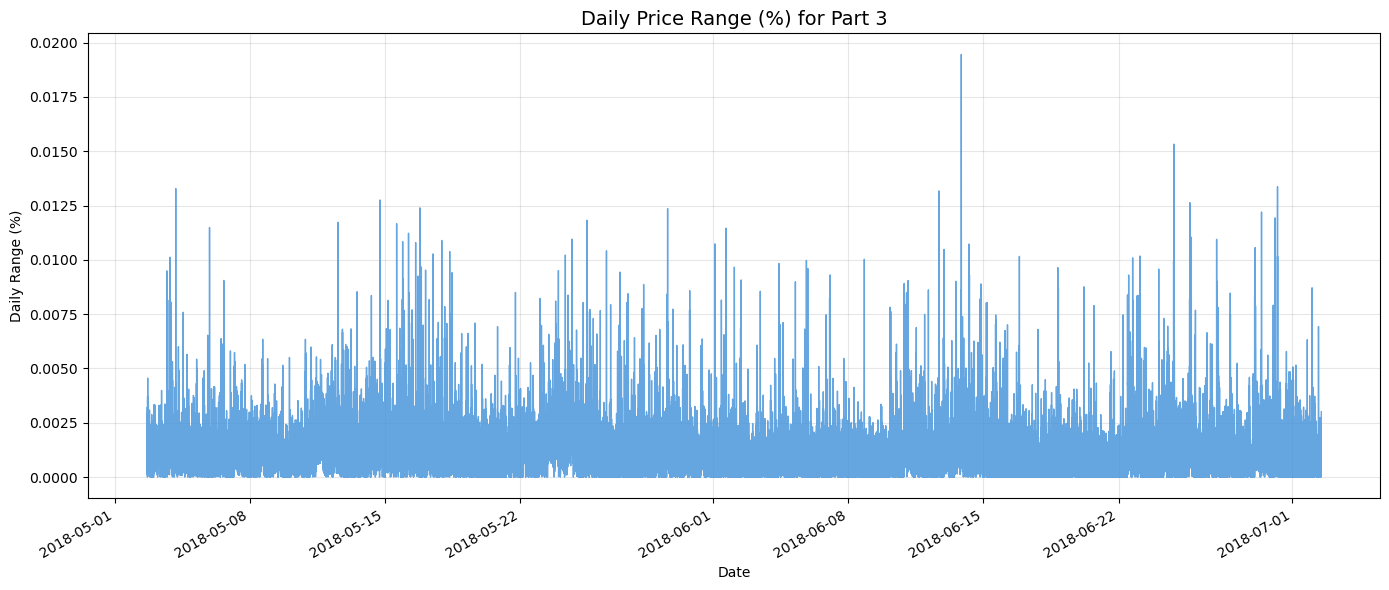

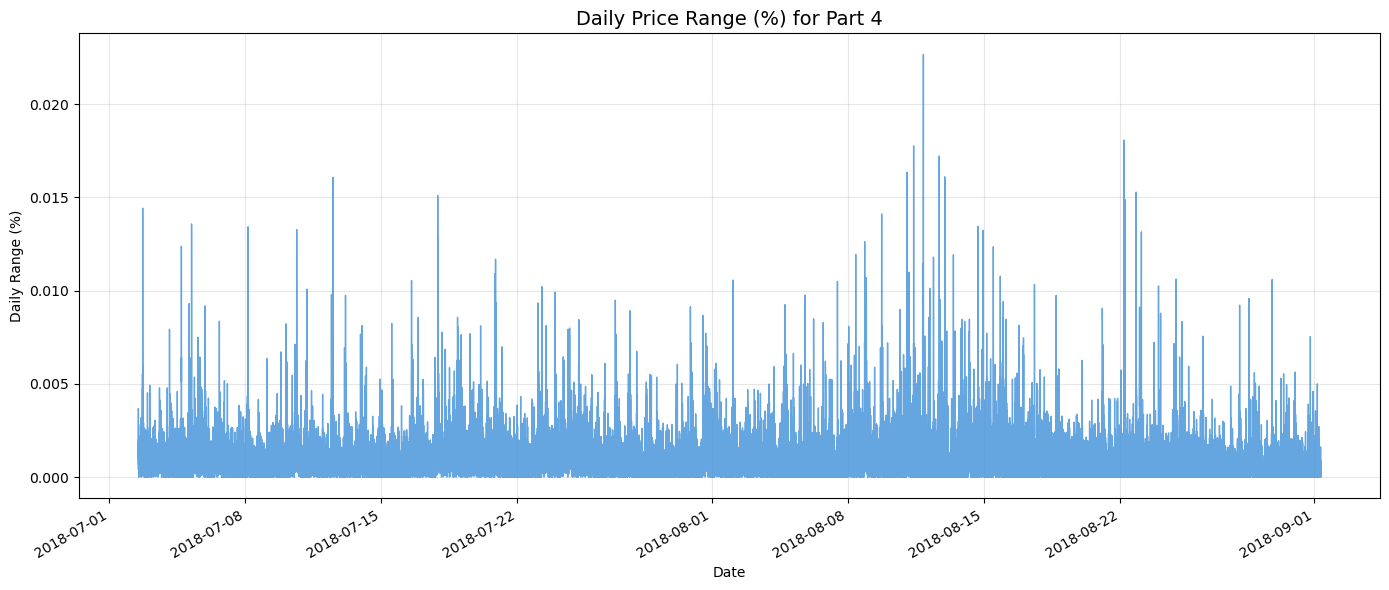

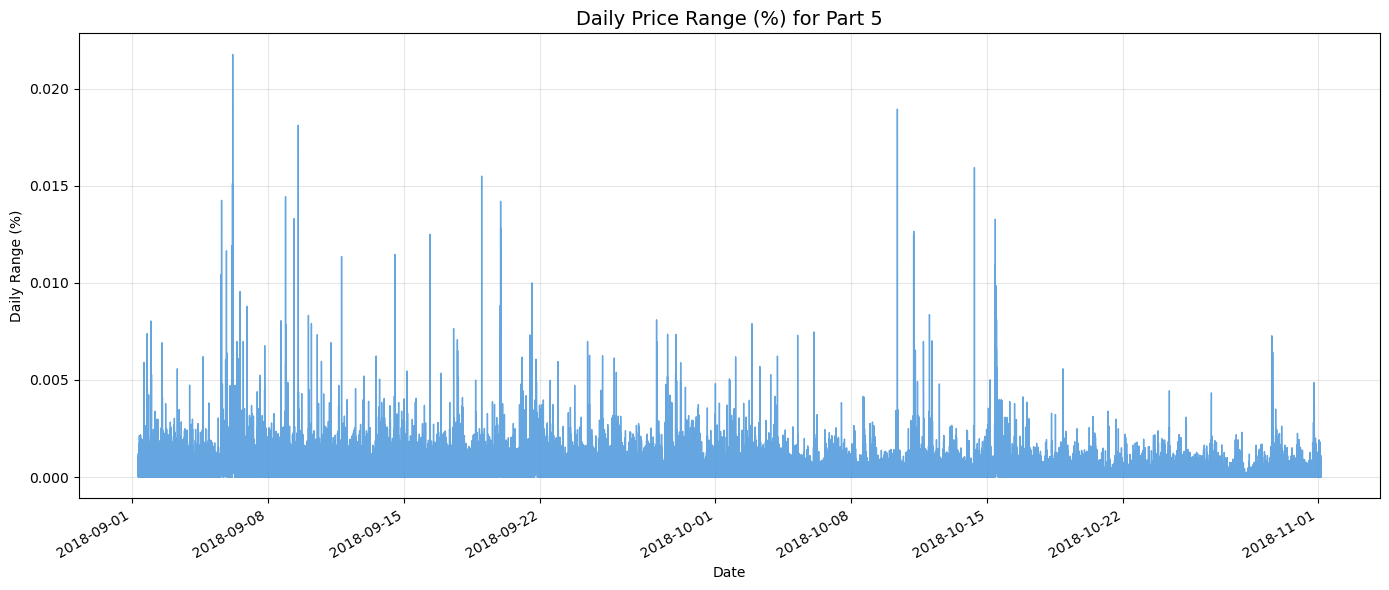

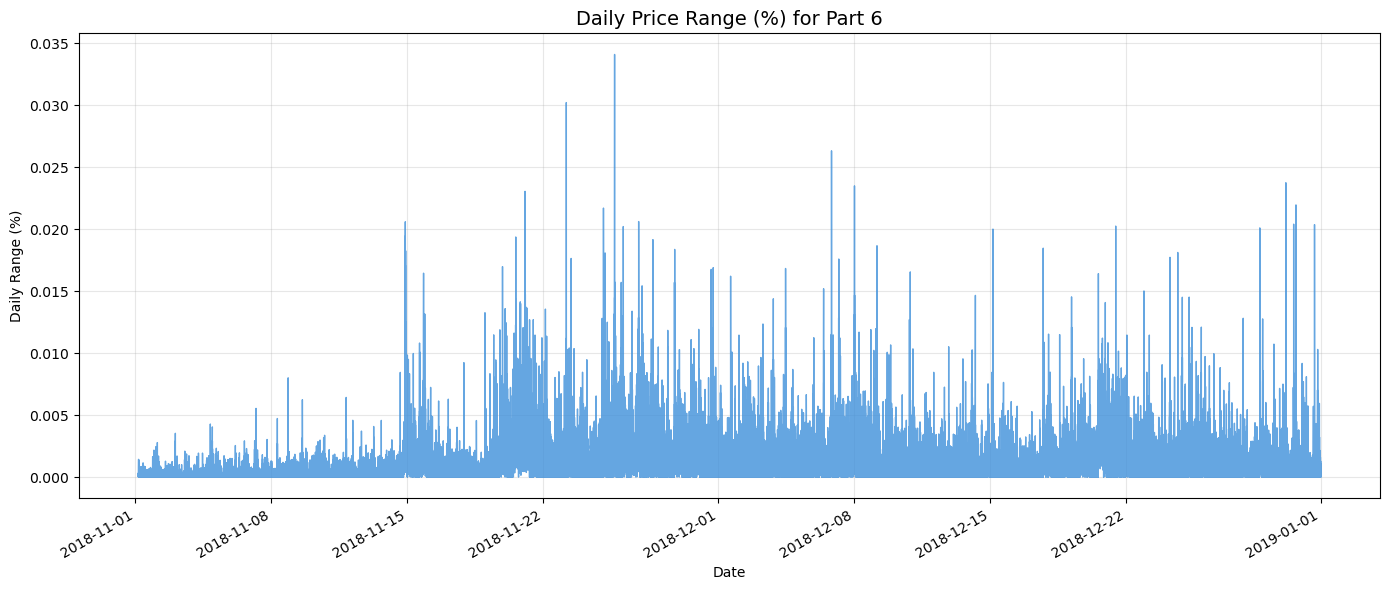

In [18]:
price_range(df1, "Daily Price Range (%) for Part 1")
price_range(df2, "Daily Price Range (%) for Part 2")
price_range(df3, "Daily Price Range (%) for Part 3")
price_range(df4, "Daily Price Range (%) for Part 4")
price_range(df5, "Daily Price Range (%) for Part 5")
price_range(df6, "Daily Price Range (%) for Part 6")

In [23]:
def drawdown_curve(df, title):
    # Extract time and close price
    ts = df["timestamp"].to_pandas()
    close_np = df["close"].to_numpy()

    # Compute drawdown
    cummax = np.maximum.accumulate(close_np)
    drawdown = (close_np - cummax) / cummax

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(ts, drawdown, linewidth=1, alpha=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Drawdown (%)")

    # Gray grid
    plt.grid(True, alpha=0.3)

    # Improve date readability
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


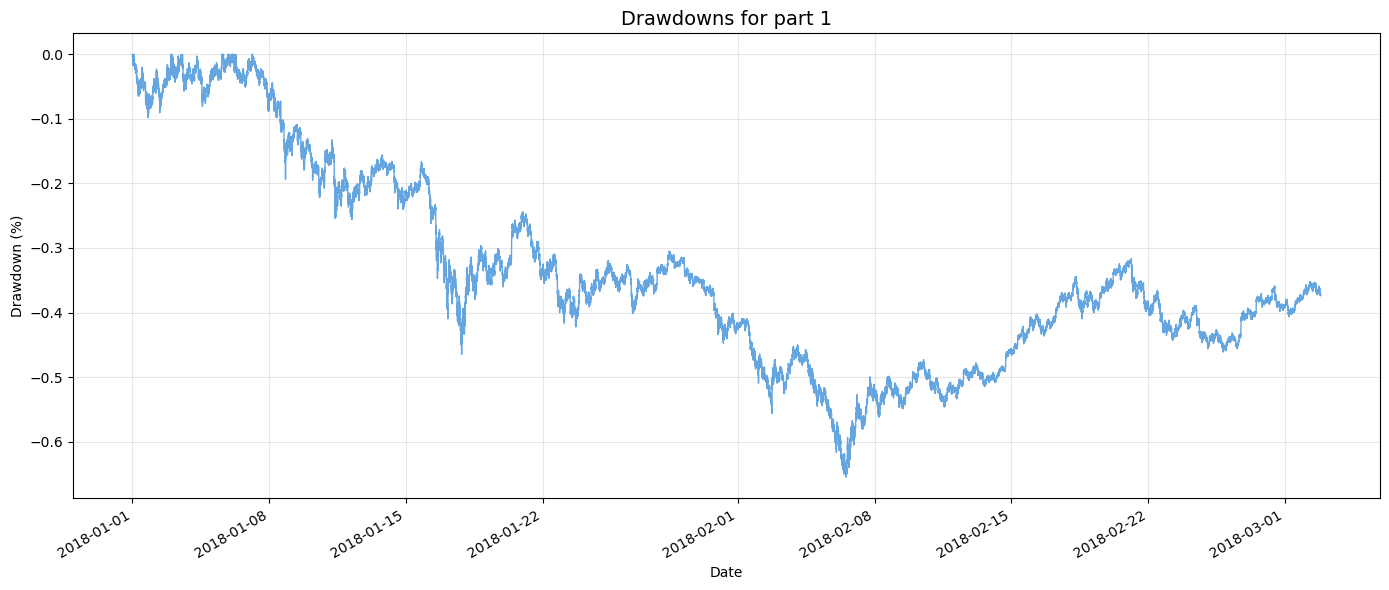

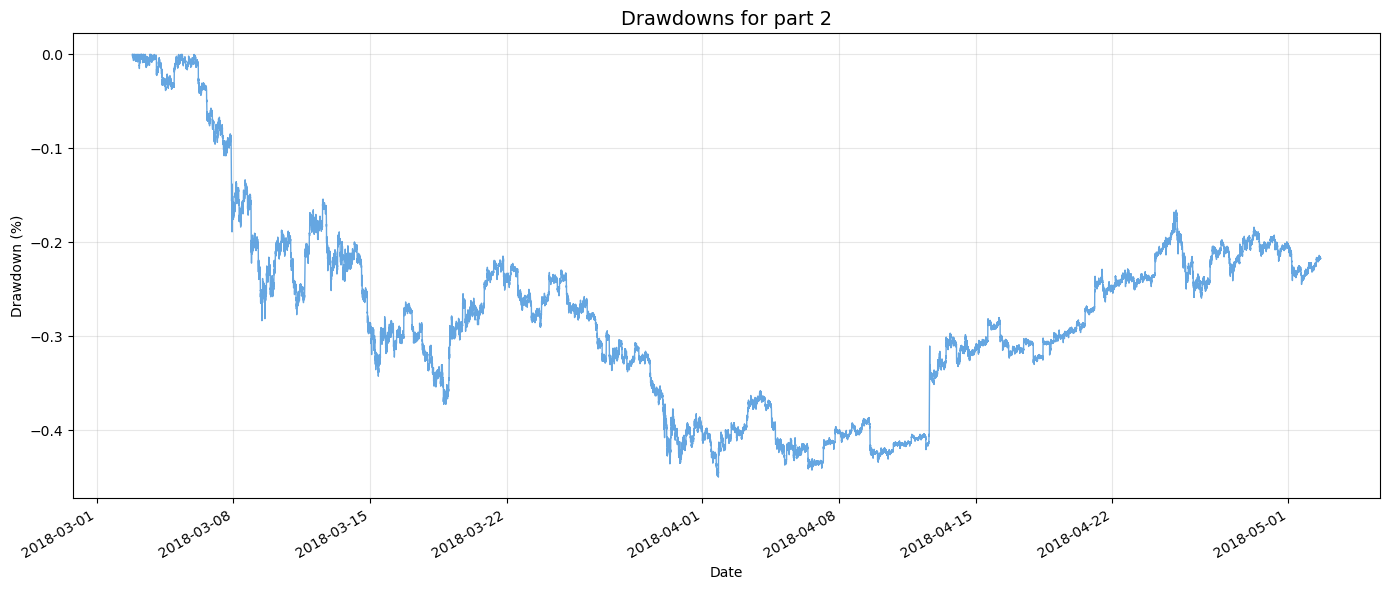

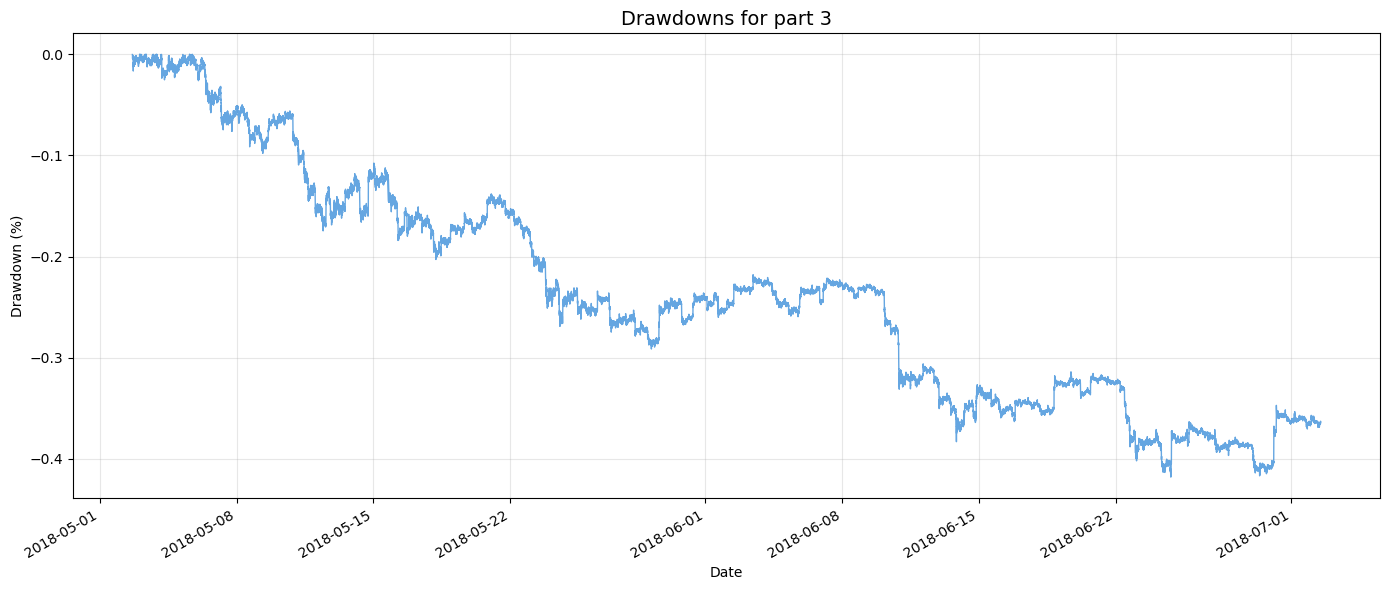

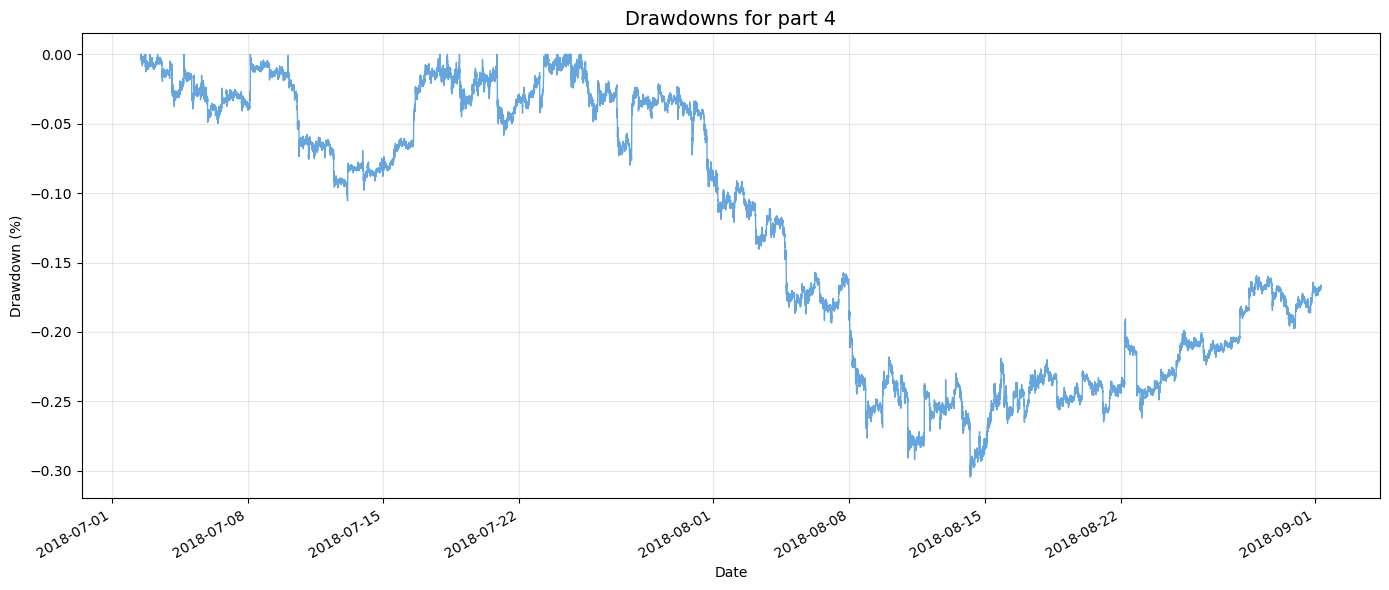

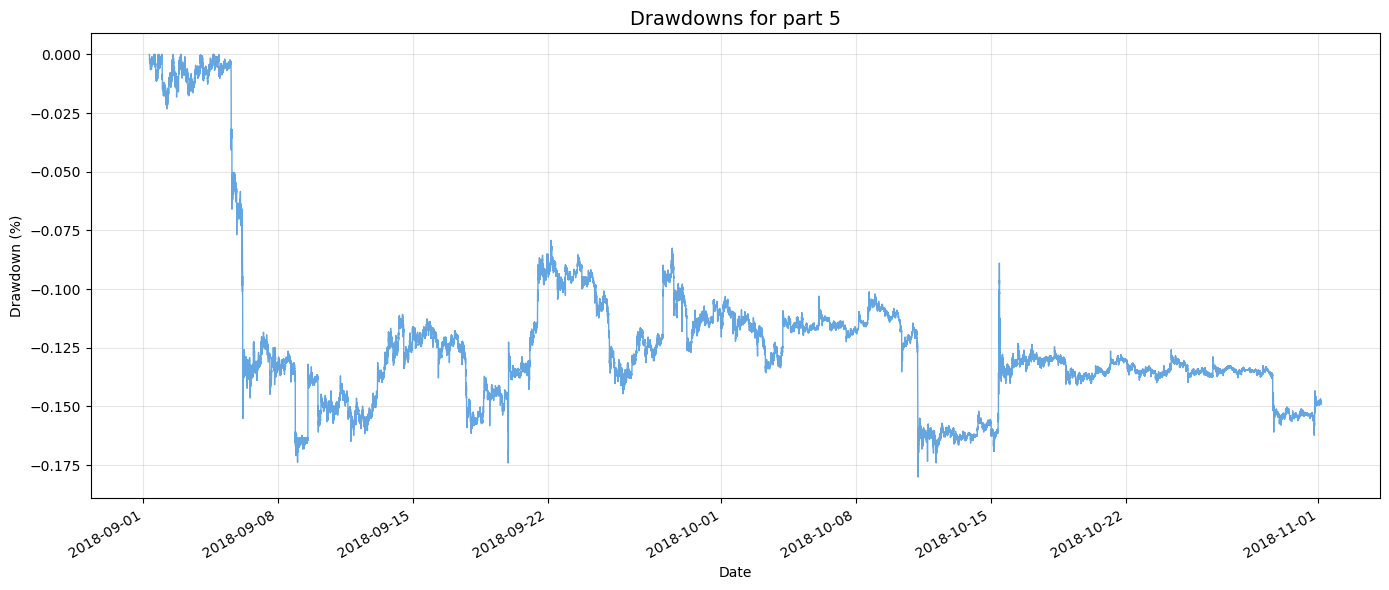

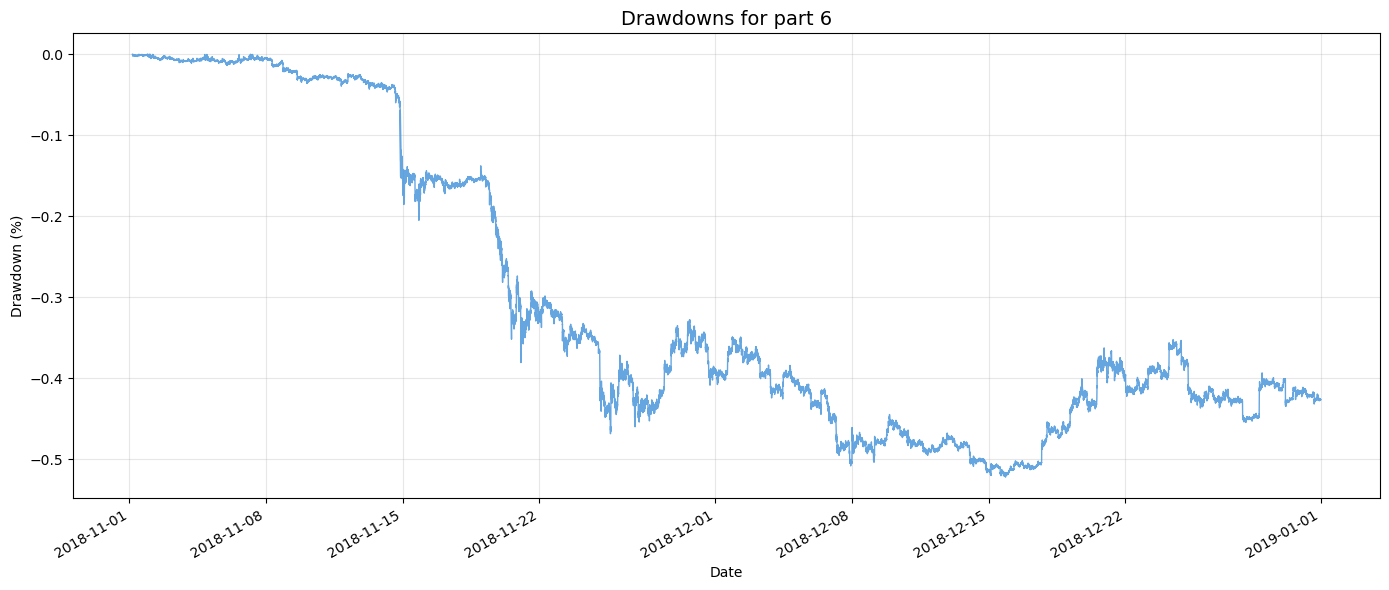

In [24]:
drawdown_curve(df1, "Drawdowns for part 1")
drawdown_curve(df2, "Drawdowns for part 2")
drawdown_curve(df3, "Drawdowns for part 3")
drawdown_curve(df4, "Drawdowns for part 4")
drawdown_curve(df5, "Drawdowns for part 5")
drawdown_curve(df6, "Drawdowns for part 6")


In [29]:
def cum_log_return(df, title):
    df = log_return(df)

    # Ensure no null log returns
    df_cum = df.drop_nulls(subset=["log_return"])
    
    # Extract timestamps + log returns
    ts = df_cum["timestamp"].to_pandas()
    log_ret = df_cum["log_return"].to_numpy()

    # Compute cumulative return from log returns
    cum_ret = np.exp(log_ret.cumsum())
    cum_ret = np.insert(cum_ret, 0, 1.0)  # start at 1 (baseline)
    ts_ext = np.insert(ts.values, 0, ts.iloc[0])  # duplicate first timestamp
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(ts_ext, cum_ret, linewidth=1, alpha=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")

    # Gray grid
    plt.grid(True, alpha=0.3)

    # Improve date readability
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


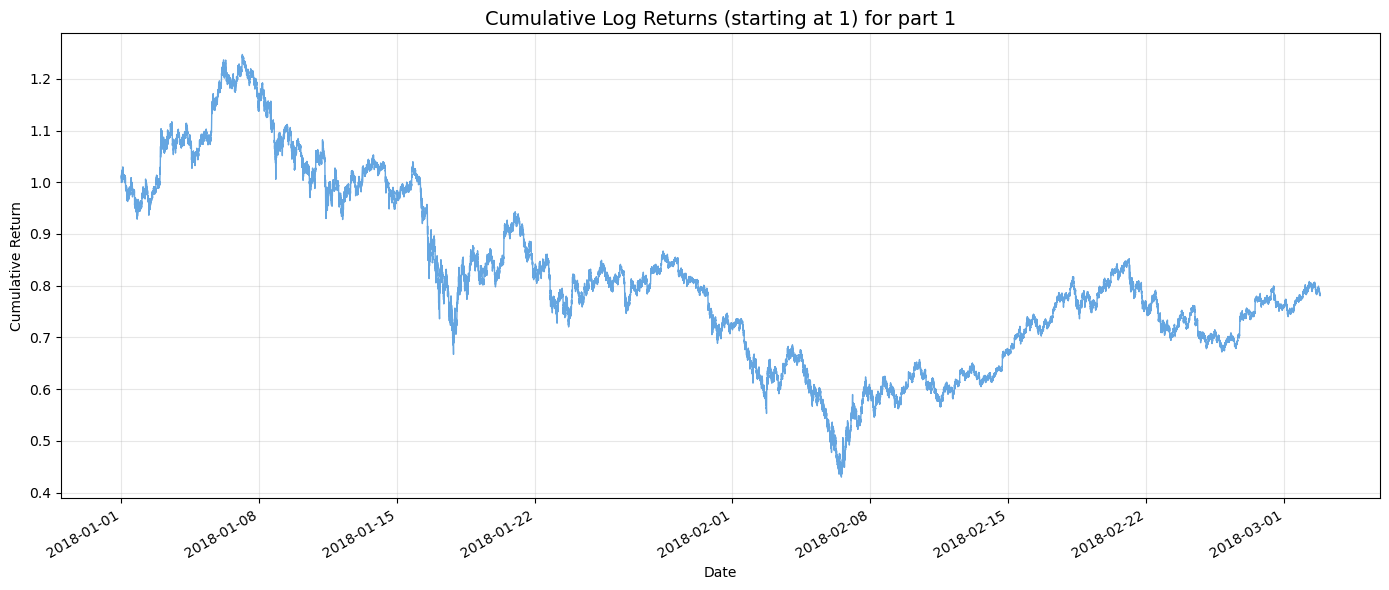

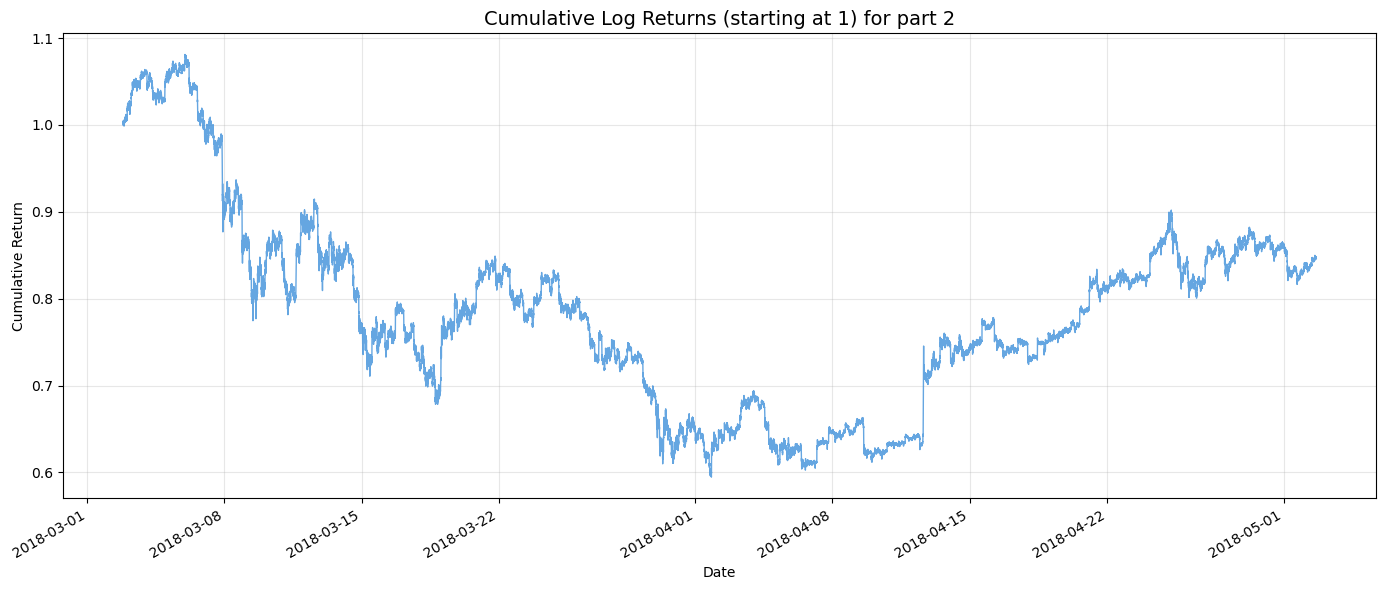

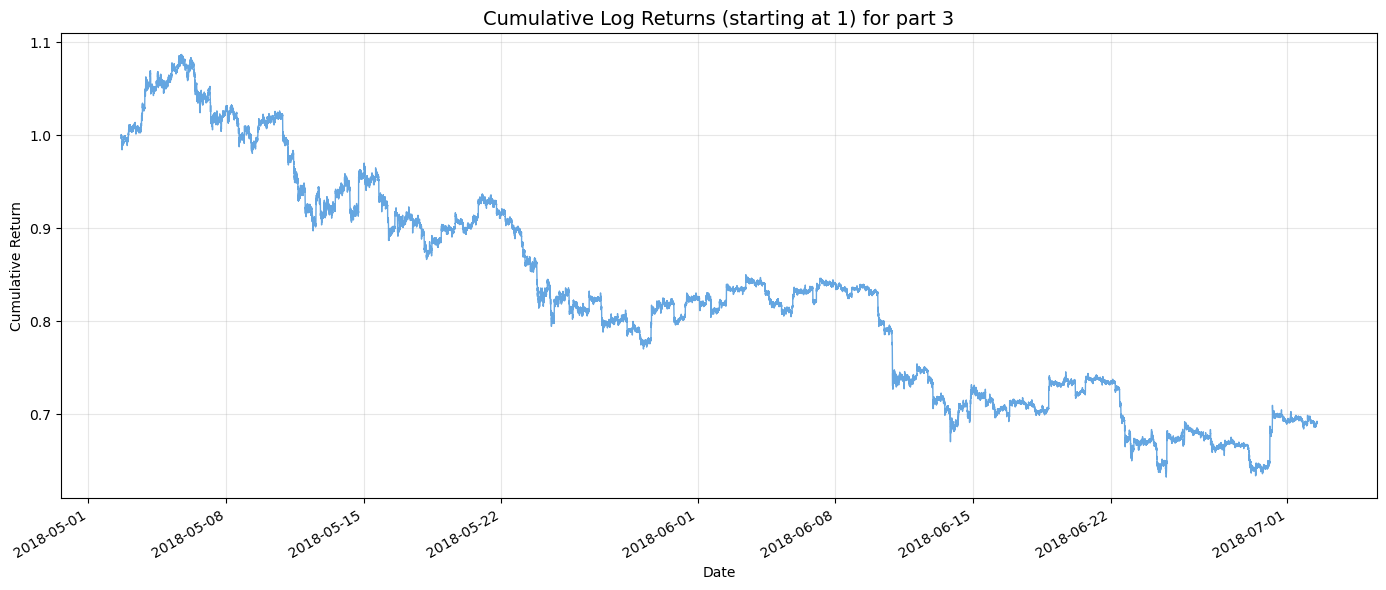

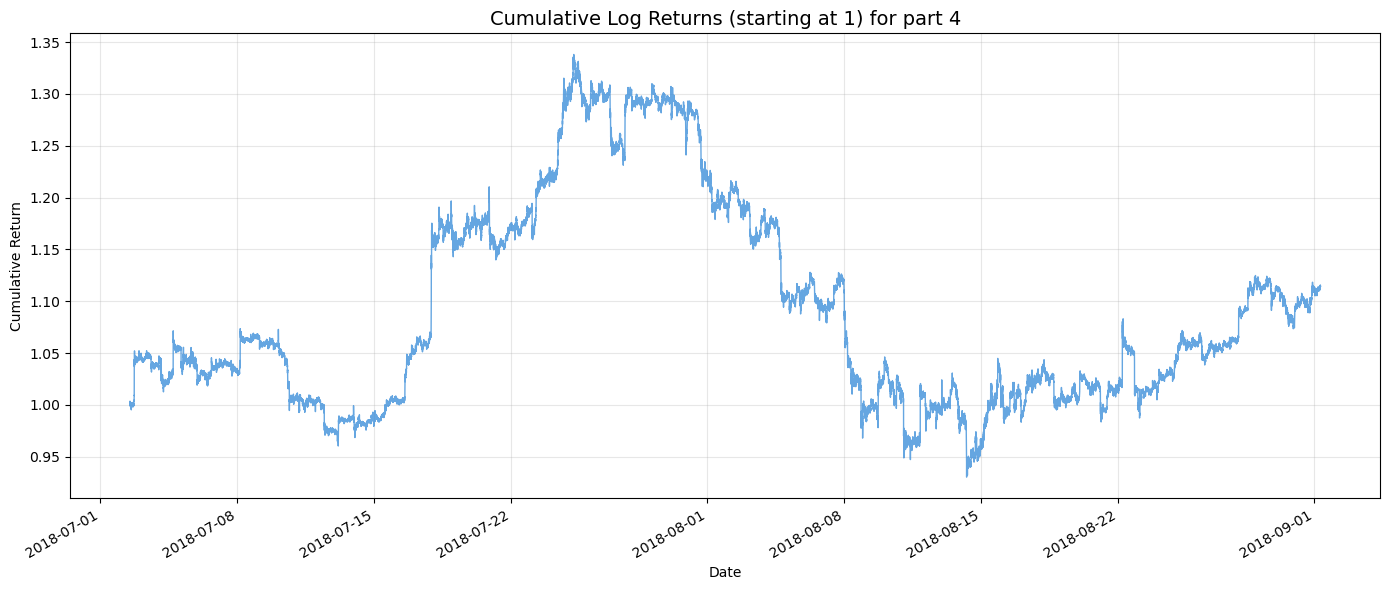

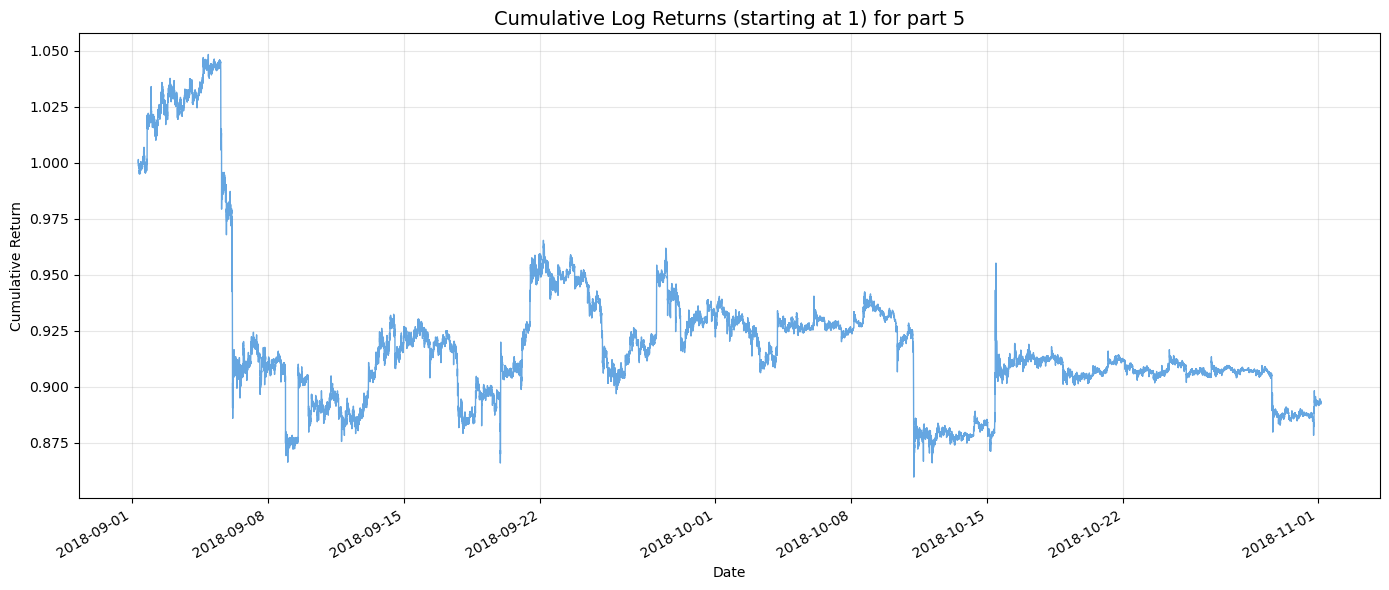

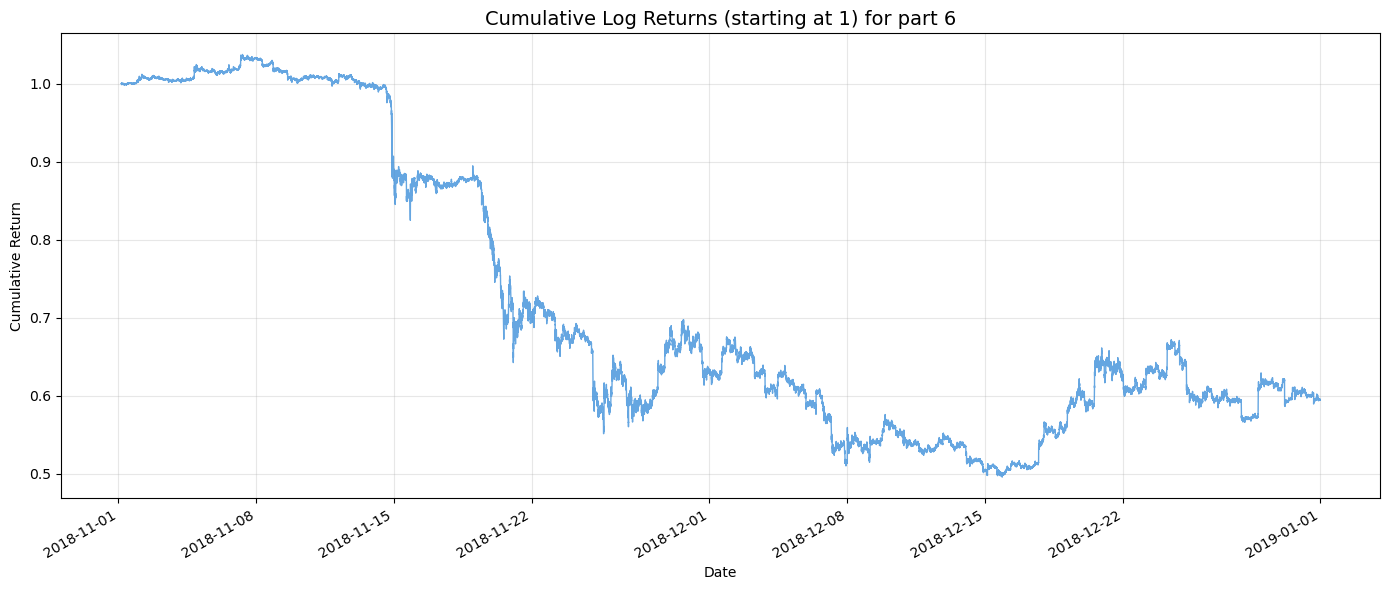

In [30]:
cum_log_return(df1, "Cumulative Log Returns (starting at 1) for part 1")
cum_log_return(df2, "Cumulative Log Returns (starting at 1) for part 2")
cum_log_return(df3, "Cumulative Log Returns (starting at 1) for part 3")
cum_log_return(df4, "Cumulative Log Returns (starting at 1) for part 4")
cum_log_return(df5, "Cumulative Log Returns (starting at 1) for part 5")
cum_log_return(df6, "Cumulative Log Returns (starting at 1) for part 6")
